In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

In [27]:
df_year_causes = pd.DataFrame()

In [28]:
for i in [
    'all causes',\
    'Communicable, maternal, perinatal and nutritional',\
    'Noncommunicable diseases',\
    'Injuries',\
    'ill-defined diseases',\
    'all causes jpn',\
    'Communicable, maternal, perinatal and nutritional jpn',\
    'Noncommunicable diseases jpn',\
    'Injuries jpn',\
    'ill-defined diseases jpn',\
    'malignant neoplasms',\
    'malignant neoplasms jpn',\
]:
    df = pd.read_excel(f"{i}.xlsx")
    df.drop([
        'Age group',\
        'Age group code',\
        'Region Code',\
        'Region Name',\
        'Country Name',\
            ], axis=1, inplace=True)
    df = df.rename(columns={'Death rate per 100 000 population':'Death rate'})
    #cleaning the data frame
    df_reduced = pd.DataFrame()
    df_reduced = df[(df['Year'] > 1959) & (df['Year'] < 2020)]
    df_reduced =  df_reduced[(df_reduced['Country Code'] == 'JPN') | (df_reduced['Country Code'] == 'CHE')]
    df_reduced['causes'] = i
    df_year_causes = pd.concat([df_year_causes, df_reduced], ignore_index=True)

In [29]:
df_year_causes.head(10)

,Country Code,Year,Sex,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate,causes,_11
0,CHE,1960,All,52094.0,100.0,867.761832,977.758592,all causes,NaN
1,CHE,1960,Male,27032.0,100.0,1041.313250,1047.264838,all causes,NaN
2,CHE,1960,Female,25062.0,100.0,728.028206,912.440383,all causes,NaN
3,CHE,1961,All,51004.0,100.0,826.391201,938.539673,all causes,NaN
4,CHE,1961,Male,26923.0,100.0,1008.705185,1021.784508,all causes,NaN
5,CHE,1961,Female,24081.0,100.0,681.150226,860.189320,all causes,NaN
6,CHE,1962,All,55125.0,100.0,873.451319,989.002117,all causes,NaN
7,CHE,1962,Male,28811.0,100.0,1061.199115,1064.590031,all causes,NaN
8,CHE,1962,Female,26314.0,100.0,724.248930,917.663470,all causes,NaN
9,CHE,1963,All,56989.0,100.0,884.005746,1000.807825,all causes,NaN


In [30]:
columns_to_remove = ['_11']
df_year_causes = df_year_causes.drop(columns=columns_to_remove)
df_year_causes['causes'].replace({'all causes jpn': 'all causes', \
                                  'Communicable, maternal, perinatal and nutritional jpn': 'Communicable, maternal, perinatal and nutritional', \
                                  'Noncommunicable diseases jpn': 'Noncommunicable diseases', \
                                  'Injuries jpn': 'Injuries', \
                                  'ill-defined diseases jpn': 'ill-defined diseases', \
                                  'malignant neoplasms jpn': 'malignant neoplasms'}, inplace=True)

In [31]:
df_year_causes.head(10)

,Country Code,Year,Sex,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate,causes
0,CHE,1960,All,52094.0,100.0,867.761832,977.758592,all causes
1,CHE,1960,Male,27032.0,100.0,1041.313250,1047.264838,all causes
2,CHE,1960,Female,25062.0,100.0,728.028206,912.440383,all causes
3,CHE,1961,All,51004.0,100.0,826.391201,938.539673,all causes
4,CHE,1961,Male,26923.0,100.0,1008.705185,1021.784508,all causes
5,CHE,1961,Female,24081.0,100.0,681.150226,860.189320,all causes
6,CHE,1962,All,55125.0,100.0,873.451319,989.002117,all causes
7,CHE,1962,Male,28811.0,100.0,1061.199115,1064.590031,all causes
8,CHE,1962,Female,26314.0,100.0,724.248930,917.663470,all causes
9,CHE,1963,All,56989.0,100.0,884.005746,1000.807825,all causes


In [32]:
import pandas as pd

unique_year = sorted(df_year_causes['Year'].unique())
unique_genders = sorted(df_year_causes['Sex'].unique())
unique_causes = sorted(df_year_causes['causes'].unique())
unique_countries = sorted(df_year_causes['Country Code'].unique())
df_plotting = pd.DataFrame(columns=['year', 'gender', 'cause', 'JPN_death_rate', 'CHE_death_rate'])

for year in unique_year:
    for gender in unique_genders:
        for cause in unique_causes:
            death_jpn = df_year_causes[
                (df_year_causes['Year'] == year) &
                (df_year_causes['Sex'] == gender) &
                (df_year_causes['causes'] == cause) &
                (df_year_causes['Country Code'] == 'JPN')
            ]['Death rate'].sum()
            death_che = df_year_causes[
                (df_year_causes['Year'] == year) &
                (df_year_causes['Sex'] == gender) &
                (df_year_causes['causes'] == cause) &
                (df_year_causes['Country Code'] == 'CHE')
            ]['Death rate'].sum()

            new_row = {
                'year': year,
                'gender': gender,
                'cause': cause,
                'JPN_death_rate': death_jpn,
                'CHE_death_rate': death_che
            }

            df_plotting = df_plotting.append(new_row, ignore_index=True)

In [33]:
df_plotting.head(10)

,year,gender,cause,JPN_death_rate,CHE_death_rate
0,1960,All,"Communicable, maternal, perinatal and nutritional",145.068696,101.409561
1,1960,All,Injuries,65.178739,80.275531
2,1960,All,Noncommunicable diseases,472.333638,781.358509
3,1960,All,all causes,756.380160,977.758592
4,1960,All,ill-defined diseases,73.799087,14.714991
5,1960,All,malignant neoplasms,100.379475,188.854896
6,1960,Female,"Communicable, maternal, perinatal and nutritional",132.117819,91.673645
7,1960,Female,Injuries,38.636206,47.730003
8,1960,Female,Noncommunicable diseases,437.063665,757.709251
9,1960,Female,all causes,692.189252,912.440383


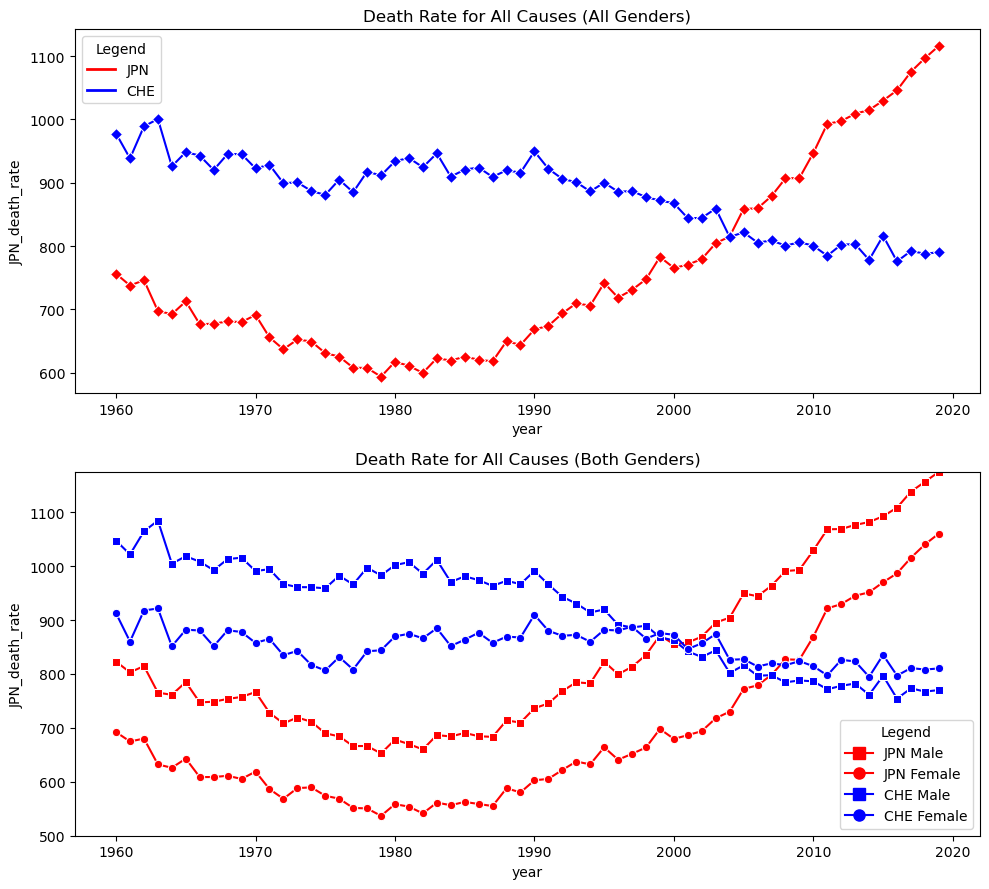

In [9]:
# Filter the data for "All Causes" for different genders
filtered_data_all_causes = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_all_causes_male = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_all_causes_female = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits
y_axis_min = 500
y_axis_max = max(filtered_data_all_causes['JPN_death_rate'].max(), 
                 filtered_data_all_causes_male['JPN_death_rate'].max(),
                 filtered_data_all_causes_female['JPN_death_rate'].max())

# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 9))

# Plot the first graph for "All Causes" (All Genders) on the top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_all_causes, x='year', y='JPN_death_rate', style='cause', markers="D", dashes=False, hue='cause', palette=["red"], ax=axes[0])
sns.lineplot(data=filtered_data_all_causes, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0])
axes[0].set_title("Death Rate for All Causes (All Genders)")
  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "All Causes" (Both Genders) on the middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_all_causes_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_all_causes_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_all_causes_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1])
sns.lineplot(data=filtered_data_all_causes_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1])
axes[1].set_title("Death Rate for All Causes (Both Genders)")
axes[1].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1].legend(handles=legend_labels_gender, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

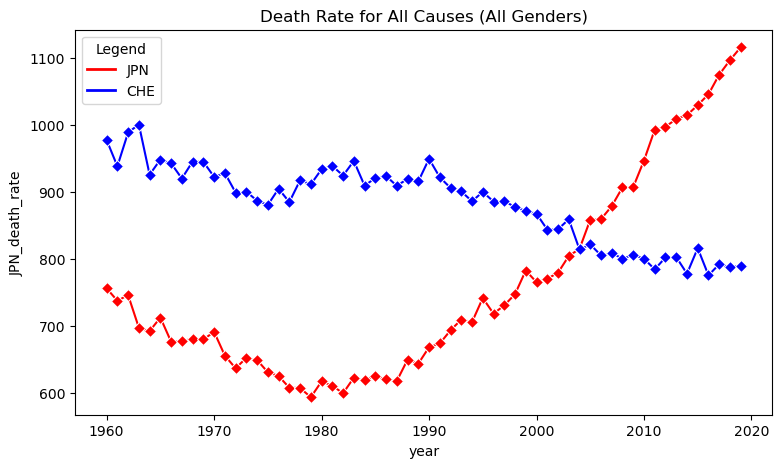

In [54]:
# Set the width and height (in inches) for the plot
fig, ax = plt.subplots(figsize=(9, 5))

# Filter the data for "All Causes" for different genders
filtered_data_all_causes = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'All')
]

# Set color palette for the lines
sns.set_palette(["red", "blue"])

# Plot the graph for "All Causes" (All Genders)
sns.lineplot(data=filtered_data_all_causes, x='year', y='JPN_death_rate', style='cause', markers="D", dashes=False, hue='cause', palette=["red"])
sns.lineplot(data=filtered_data_all_causes, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"])

# Set the title for the graph
plt.title("Death Rate for All Causes (All Genders)")

# Create custom legend entries for the graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]

# Add the legend to the graph
plt.legend(handles=legend_labels_all, title="Legend")

# Show the plot
plt.show()

Check to see if the JPN death rate follows the exponential function.

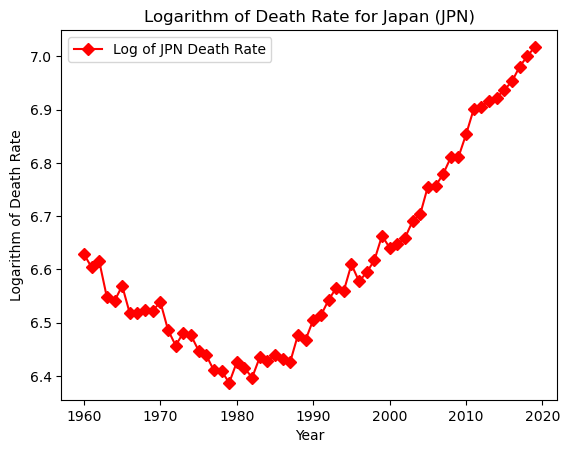

In [55]:
# Compute the logarithm of the death rate data
log_JPN_death_rate = np.log(filtered_data_all_causes['JPN_death_rate'])

# Create a line plot of the logarithm of the death rate
plt.plot(filtered_data_all_causes['year'], log_JPN_death_rate, label='Log of JPN Death Rate', marker='D', linestyle='-', color='red')

# Set axis labels and a title
plt.xlabel('Year')
plt.ylabel('Logarithm of Death Rate')
plt.title('Logarithm of Death Rate for Japan (JPN)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


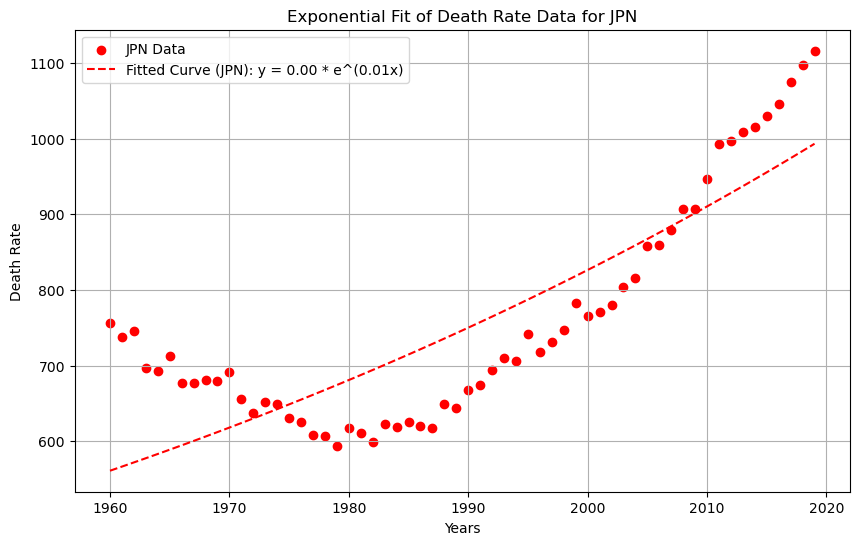

R-squared (JPN): 0.687
Correlation (JPN) between Year and Death Rate: 0.79


In [88]:

years = filtered_data_all_causes['year']
death_rates = filtered_data_all_causes['JPN_death_rate']


death_rates = np.array(death_rates, dtype=float)
years = np.array(years, dtype=float)


# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Provide initial guesses for parameters a and b
initial_guess = (0.027, 0.001)  # Replace with your own initial values

# Fit the curve using the Trust Region Reflective method and the initial guess
params_JPN, covariance_JPN = curve_fit(exponential_function, years, death_rates, p0=initial_guess, method='trf')
a_JPN, b_JPN = params_JPN

# Create a range of x values for the curve
x_fit = np.linspace(min(years), max(years), 100)
y_fit_JPN = exponential_function(x_fit, a_JPN, b_JPN)

# Calculating the R-squared value for the fit for JPN
y_pred_JPN = exponential_function(years, a_JPN, b_JPN)
ssr_JPN = np.sum((death_rates - y_pred_JPN) ** 2)  # Sum of squares of residuals
sst_JPN = np.sum((death_rates - np.mean(death_rates)) ** 2)  # Total sum of squares
r_squared_JPN = 1 - (ssr_JPN / sst_JPN)

# Calculate the correlation
correlation_JPN = np.corrcoef(years, death_rates)[0, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(years, death_rates, label="JPN Data", color='red')
plt.plot(x_fit, y_fit_JPN, 'r', label=f'Fitted Curve (JPN): y = {a_JPN:.2f} * e^({b_JPN:.2f}x)', linestyle='--')

plt.xlabel('Years')
plt.ylabel('Death Rate')
plt.legend()
plt.title('Exponential Fit of Death Rate Data for JPN')
plt.grid(True)
plt.show()

# Print R-squared and correlation
print(f'R-squared (JPN): {r_squared_JPN:.3f}')
print(f'Correlation (JPN) between Year and Death Rate: {correlation_JPN:.2f}')

The analysis of the data indicates that a linear fitted line provides a valid and appropriate description of the observed trend. An exponential model does not appear to accurately represent the relationship between the variables under consideration. This finding suggests that the data exhibits a linear pattern over time, and the linear model is a suitable choice for describing the observed trend.

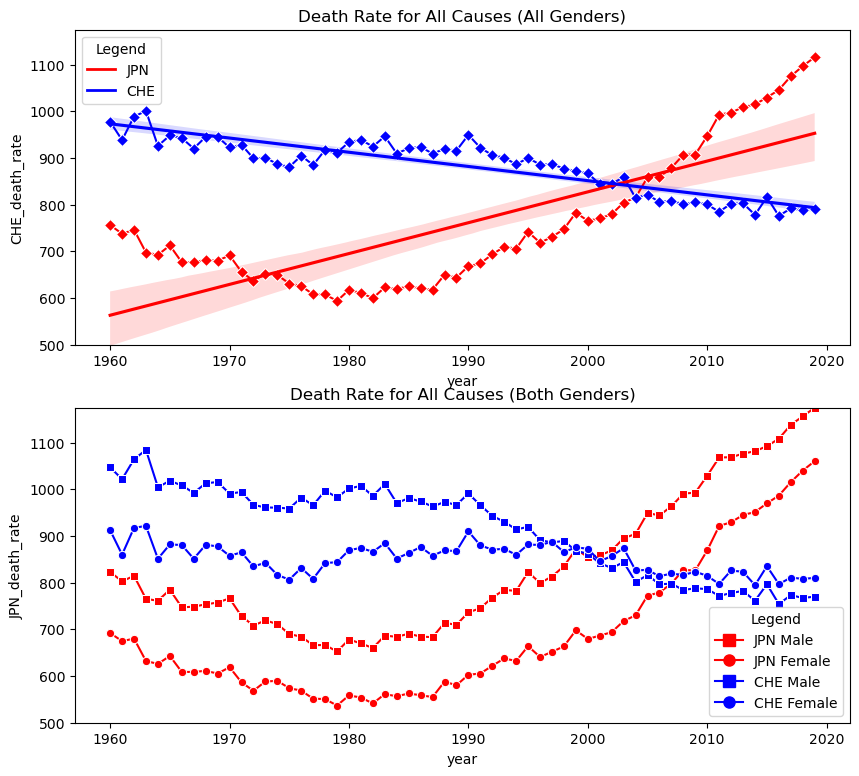

In [17]:
# Filter the data for "All Causes" for different genders
filtered_data_all_causes = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_all_causes_male = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_all_causes_female = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'Female')
]

# Convert 'year' column to numeric
filtered_data_all_causes['year'] = pd.to_numeric(filtered_data_all_causes['year'], errors='coerce')
filtered_data_all_causes_male['year'] = pd.to_numeric(filtered_data_all_causes_male['year'], errors='coerce')
filtered_data_all_causes_female['year'] = pd.to_numeric(filtered_data_all_causes_female['year'], errors='coerce')

# Set the common y-axis limits
y_axis_min = 500
y_axis_max = max(filtered_data_all_causes['JPN_death_rate'].max(), 
                 filtered_data_all_causes_male['JPN_death_rate'].max(),
                 filtered_data_all_causes_female['JPN_death_rate'].max())

# Create a figure with a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 9))

# Define a function to add fitted lines to the existing plots
def add_fitted_lines(data, x, y, ax, color):
    sns.regplot(data=data, x=x, y=y, scatter=False, color=color, ax=ax)

# Plot the first graph for "All Causes" (All Genders) on the top subplot
sns.set_palette(["red", "blue"])
sns.lineplot(data=filtered_data_all_causes, x='year', y='JPN_death_rate', style='cause', markers="D", dashes=False, hue='cause', palette=["red"], ax=axes[0])
sns.lineplot(data=filtered_data_all_causes, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0])
add_fitted_lines(filtered_data_all_causes, 'year', 'JPN_death_rate', axes[0], 'red')
add_fitted_lines(filtered_data_all_causes, 'year', 'CHE_death_rate', axes[0], 'blue')
axes[0].set_title("Death Rate for All Causes (All Genders)")

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "All Causes" (Both Genders) on the middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_all_causes_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_all_causes_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_all_causes_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1])
sns.lineplot(data=filtered_data_all_causes_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1])
axes[1].set_title("Death Rate for All Causes (Both Genders)")
axes[1].set_ylim(y_axis_min, y_axis_max) 

# Set the same y-axis limits for all subplots
axes[0].set_ylim(y_axis_min, y_axis_max)
axes[1].set_ylim(y_axis_min, y_axis_max)

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1].legend(handles=legend_labels_gender, title="Legend")

# Show the plots
plt.show()

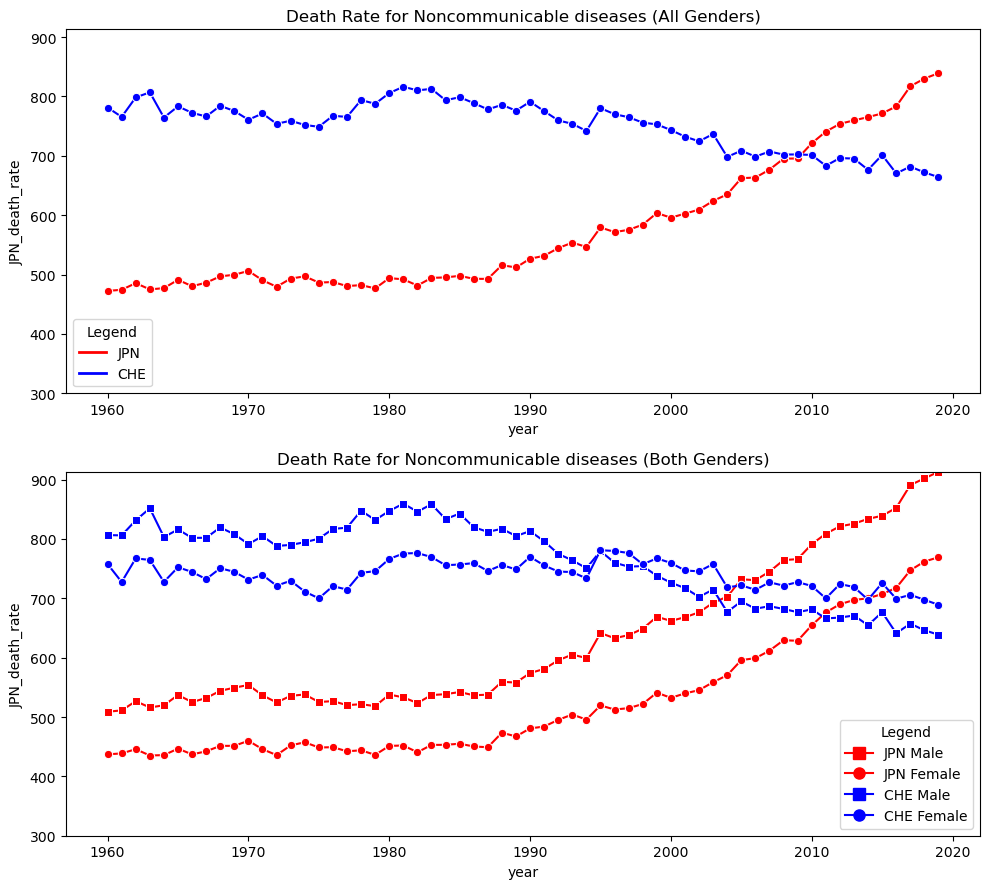

In [54]:
filtered_data_noncommunicable = df_plotting[
    (df_plotting['cause'] == 'Noncommunicable diseases') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_noncommunicable_male = df_plotting[
    (df_plotting['cause'] == 'Noncommunicable diseases') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_noncommunicable_female = df_plotting[
    (df_plotting['cause'] == 'Noncommunicable diseases') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits
y_axis_min = 300
y_axis_max = max(filtered_data_noncommunicable['JPN_death_rate'].max(), 
                 filtered_data_noncommunicable_male['JPN_death_rate'].max(),
                 filtered_data_noncommunicable_female['JPN_death_rate'].max())

# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 9))

# Plot the first graph for "Noncommunicable diseases" (All Genders) on the top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable, x='year', y='JPN_death_rate', style='cause', markers=True, dashes=False, hue='cause', palette=["red"], ax=axes[0])
sns.lineplot(data=filtered_data_noncommunicable, x='year', y='CHE_death_rate', style='cause', markers=True, dashes=False, hue='cause', palette=["blue"], ax=axes[0])
axes[0].set_title("Death Rate for Noncommunicable diseases (All Genders)")
axes[0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "Noncommunicable diseases" (Both Genders) on the middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_noncommunicable_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_noncommunicable_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1])
sns.lineplot(data=filtered_data_noncommunicable_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1])
axes[1].set_title("Death Rate for Noncommunicable diseases (Both Genders)")
axes[1].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1].legend(handles=legend_labels_gender, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

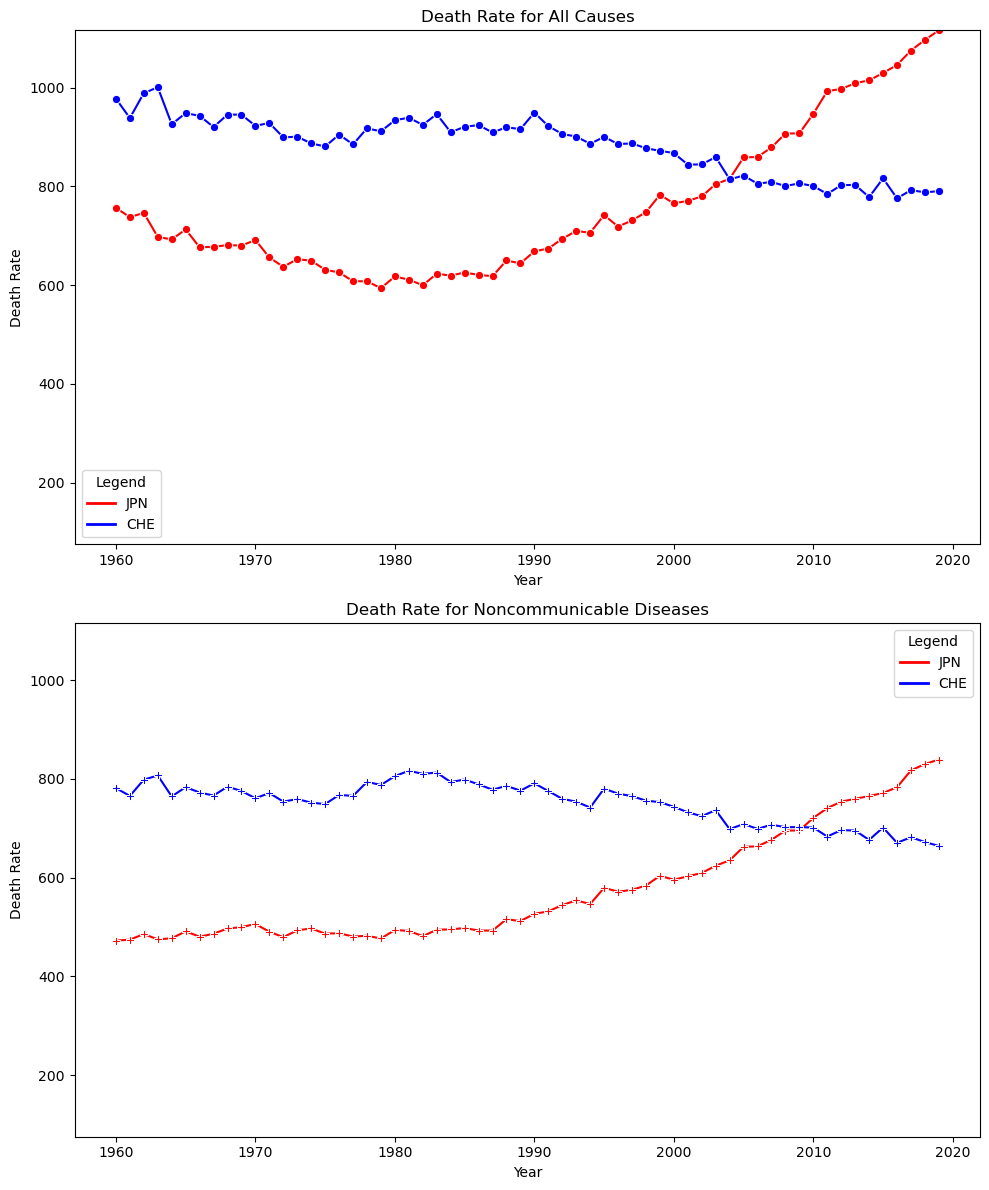

In [55]:
# Filter the data based on conditions
filtered_data_noncommunicable = df_plotting[
    (df_plotting['cause'] != 'all causes') 
    & (df_plotting['cause'] == 'Noncommunicable diseases')
    & (df_plotting['gender'] == 'All')
]

filtered_data_all_causes = df_plotting[
    (df_plotting['cause'] == 'all causes') 
    & (df_plotting['gender'] == 'All')
]

# Set the common y-axis limits
y_axis_min = 75
y_axis_max = max(filtered_data_all_causes['JPN_death_rate'].max(), filtered_data_noncommunicable['JPN_death_rate'].max())

# Create a figure with a 2x1 grid of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot the first graph for "All Causes" on the top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_all_causes, x='year', y='JPN_death_rate', style='cause', markers=True, dashes=False, hue='cause', palette=["red"], ax=axes[0])
sns.lineplot(data=filtered_data_all_causes, x='year', y='CHE_death_rate', style='cause', markers=True, dashes=False, hue='cause', palette=["blue"], ax=axes[0])

axes[0].set_xlabel("Year")
axes[0].set_ylabel("Death Rate")
axes[0].set_title("Death Rate for All Causes")
axes[0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for both subplots

# Plot the second graph for "Noncommunicable Diseases" on the bottom subplot with plus-shaped markers
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable, x='year', y='JPN_death_rate', style='cause', markers=["P"], dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_noncommunicable, x='year', y='CHE_death_rate', style='cause', markers=["P"], dashes=False, hue='cause', palette=["blue"], ax=axes[1])

axes[1].set_xlabel("Year")
axes[1].set_ylabel("Death Rate")
axes[1].set_title("Death Rate for Noncommunicable Diseases")
axes[1].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for both subplots

# Create custom legend entries
legend_labels = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                 Line2D([0], [0], color='blue', lw=2, label='CHE')]

# Customize the legend for each subplot
axes[0].legend(handles=legend_labels, title="Legend")
axes[1].legend(handles=legend_labels, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

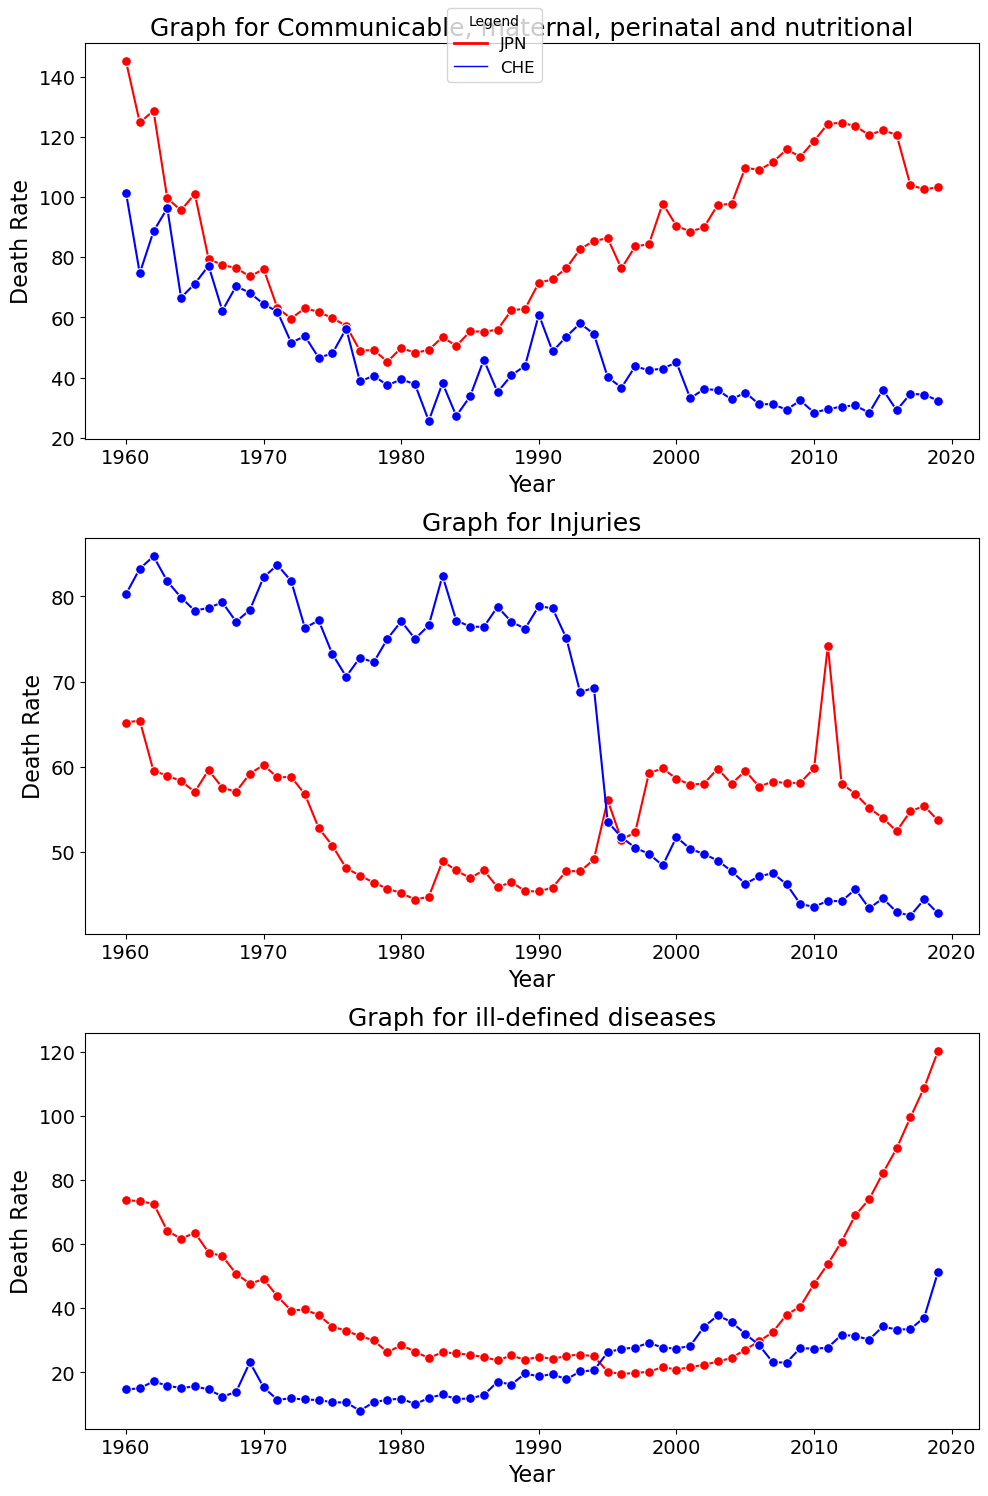

In [56]:
# Filter the data to include only rows where 'Sex' is 'All' and exclude rows where 'cause' is "all causes"
df_filtered = df_plotting[(df_plotting['gender'] == 'All') & (df_plotting['cause'] != 'all causes') & (df_plotting['cause'] != 'Noncommunicable diseases')]

# Get unique causes after filtering
unique_causes = df_filtered['cause'].unique()

# Calculate the number of rows needed for subplots
n_rows = len(unique_causes)  # Number of unique causes
n_cols = 1  # 1 column

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))

# Customize the color palette for JPN and CHE lines
colors = ["blue", "red"]

# Initialize a list to store the filtered data frames
filtered_data_list = []

for i, cause in enumerate(unique_causes):
    # Filter the data for the current cause
    filtered_data = df_filtered[df_filtered['cause'] == cause]

    # Create a line plot for JPN (set color to 'red')
    ax = sns.lineplot(data=filtered_data, x='year', y='JPN_death_rate', ax=axes[i], color=colors[1], marker='o', markersize=7)

    # Create a line plot for CHE (set color to 'blue')
    sns.lineplot(data=filtered_data, x='year', y='CHE_death_rate', ax=ax, color=colors[0], marker='o', markersize=7)

    # Set the axis labels and title
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Death Rate", fontsize=16)
    ax.set_title(f"Graph for {cause}", fontsize=18)

    # Set the font size for the axis tick labels
    ax.tick_params(axis='both', labelsize=14)

    # Append the filtered data to the list
    filtered_data_list.append(filtered_data)

# Create custom legend entries
legend_labels = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                 Line2D([0], [0], color='blue', lw=1, label='CHE')]
legend = fig.legend(handles=legend_labels, title="Legend", loc='upper center', prop={'size': 12})

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

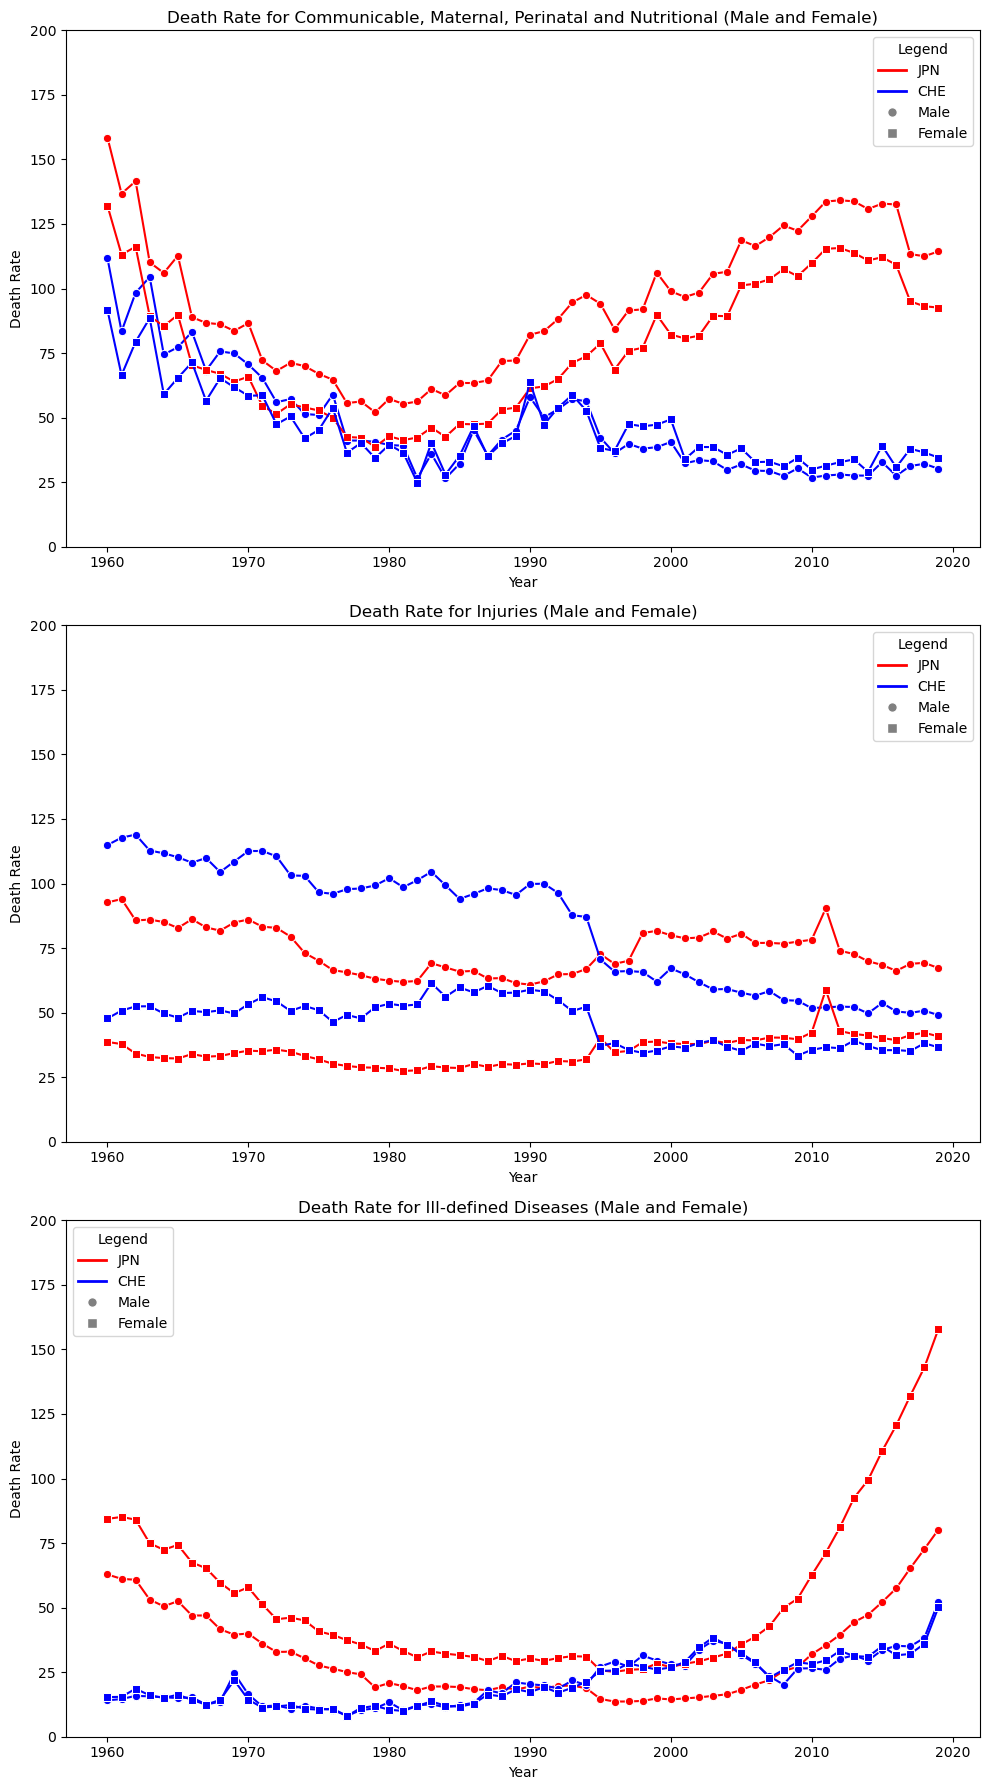

In [59]:
# Filter the data for "Communicable, maternal, perinatal and nutritional"
filtered_data_cause_communicable_male = df_plotting[
    (df_plotting['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_cause_communicable_female = df_plotting[
    (df_plotting['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting['gender'] == 'Female')
]

# Filter the data for "Injuries"
filtered_data_cause_injuries_male = df_plotting[
    (df_plotting['cause'] == 'Injuries') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_cause_injuries_female = df_plotting[
    (df_plotting['cause'] == 'Injuries') 
    & (df_plotting['gender'] == 'Female')
]

# Filter the data for "Ill-defined diseases"
filtered_data_cause_ill_defined_male = df_plotting[
    (df_plotting['cause'] == 'ill-defined diseases') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_cause_ill_defined_female = df_plotting[
    (df_plotting['cause'] == 'ill-defined diseases') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits
y_axis_min = 0
y_axis_max = 200

# Create a figure with a 2x1 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot the first graph for "Communicable, maternal, perinatal and nutritional" on the top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_cause_communicable_male, x='year', y='JPN_death_rate', style='cause', markers='o', dashes=False, hue='cause', palette=["red"], ax=axes[0])
sns.lineplot(data=filtered_data_cause_communicable_male, x='year', y='CHE_death_rate', style='cause', markers='o', dashes=False, hue='cause', palette=["blue"], ax=axes[0])
sns.lineplot(data=filtered_data_cause_communicable_female, x='year', y='JPN_death_rate', style='cause', markers='s', dashes=False, hue='cause', palette=["red"], ax=axes[0])
sns.lineplot(data=filtered_data_cause_communicable_female, x='year', y='CHE_death_rate', style='cause', markers='s', dashes=False, hue='cause', palette=["blue"], ax=axes[0])

axes[0].set_xlabel("Year")
axes[0].set_ylabel("Death Rate")
axes[0].set_title("Death Rate for Communicable, Maternal, Perinatal and Nutritional (Male and Female)")
axes[0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all three subplots

# Plot the second graph for "Injuries" on the middle subplot with different markers for male and female
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_cause_injuries_male, x='year', y='JPN_death_rate', style='cause', markers='o', dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_cause_injuries_male, x='year', y='CHE_death_rate', style='cause', markers='o', dashes=False, hue='cause', palette=["blue"], ax=axes[1])
sns.lineplot(data=filtered_data_cause_injuries_female, x='year', y='JPN_death_rate', style='cause', markers='s', dashes=False, hue='cause', palette=["red"], ax=axes[1])
sns.lineplot(data=filtered_data_cause_injuries_female, x='year', y='CHE_death_rate', style='cause', markers='s', dashes=False, hue='cause', palette=["blue"], ax=axes[1])

axes[1].set_xlabel("Year")
axes[1].set_ylabel("Death Rate")
axes[1].set_title("Death Rate for Injuries (Male and Female)")
axes[1].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all three subplots

# Plot the third graph for "Ill-defined diseases" on the bottom subplot with different markers for male and female
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_cause_ill_defined_male, x='year', y='JPN_death_rate', style='cause', markers='o', dashes=False, hue='cause', palette=["red"], ax=axes[2])
sns.lineplot(data=filtered_data_cause_ill_defined_male, x='year', y='CHE_death_rate', style='cause', markers='o', dashes=False, hue='cause', palette=["blue"], ax=axes[2])
sns.lineplot(data=filtered_data_cause_ill_defined_female, x='year', y='JPN_death_rate', style='cause', markers='s', dashes=False, hue='cause', palette=["red"], ax=axes[2])
sns.lineplot(data=filtered_data_cause_ill_defined_female, x='year', y='CHE_death_rate', style='cause', markers='s', dashes=False, hue='cause', palette=["blue"], ax=axes[2])

axes[2].set_xlabel("Year")
axes[2].set_ylabel("Death Rate")
axes[2].set_title("Death Rate for Ill-defined Diseases (Male and Female)")
axes[2].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all three subplots

# Create custom legend entries
legend_labels = [
    Line2D([0], [0], color='red', lw=2, label='JPN'),
    Line2D([0], [0], color='blue', lw=2, label='CHE'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=7, label='Male', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='grey', markersize=7, label='Female', linestyle='None')
]

# Customize the legend for each subplot
for ax in axes:
    ax.legend(handles=legend_labels, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

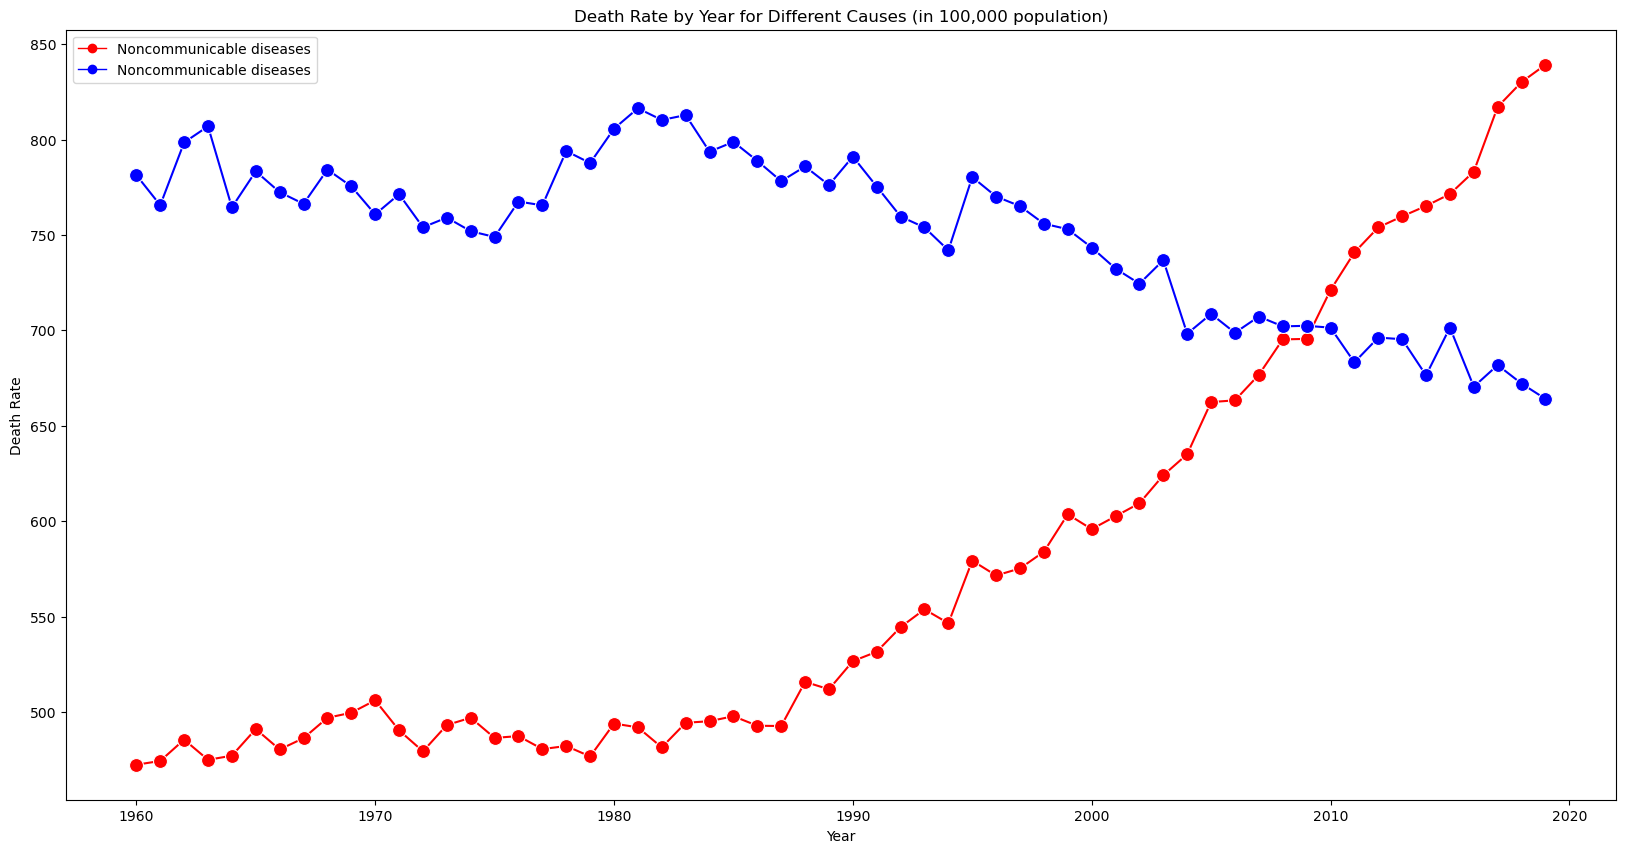

In [60]:
# Create a line plot with different lines for each 'cause'
plt.figure(figsize=(20, 10))  # Set the figure size

# Use seaborn to create a line plot with a different line for each 'cause'
sns.set_palette(["red", "blue"])  # Set color palette

# Filter the data based on conditions
filtered_data = df_plotting[
    (df_plotting['cause'] != 'all causes') & (df_plotting['gender'] == 'All')
]

# Create the line plot for JPN (set color to 'blue')
sns.lineplot(data=filtered_data[filtered_data['cause'] == 'Noncommunicable diseases'], x='year', y='JPN_death_rate', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["red"])

# Create the line plot for CHE (set color to 'red')
sns.lineplot(data=filtered_data[filtered_data['cause'] == 'Noncommunicable diseases'], x='year', y='CHE_death_rate', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["blue"])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.title("Death Rate by Year for Different Causes (in 100,000 population)")

# Get the legend object
legend = plt.legend()

# Customize the legend
for line in legend.get_lines():
    line.set_linewidth(1)  # Set the legend line width

# Show the plot
plt.show()

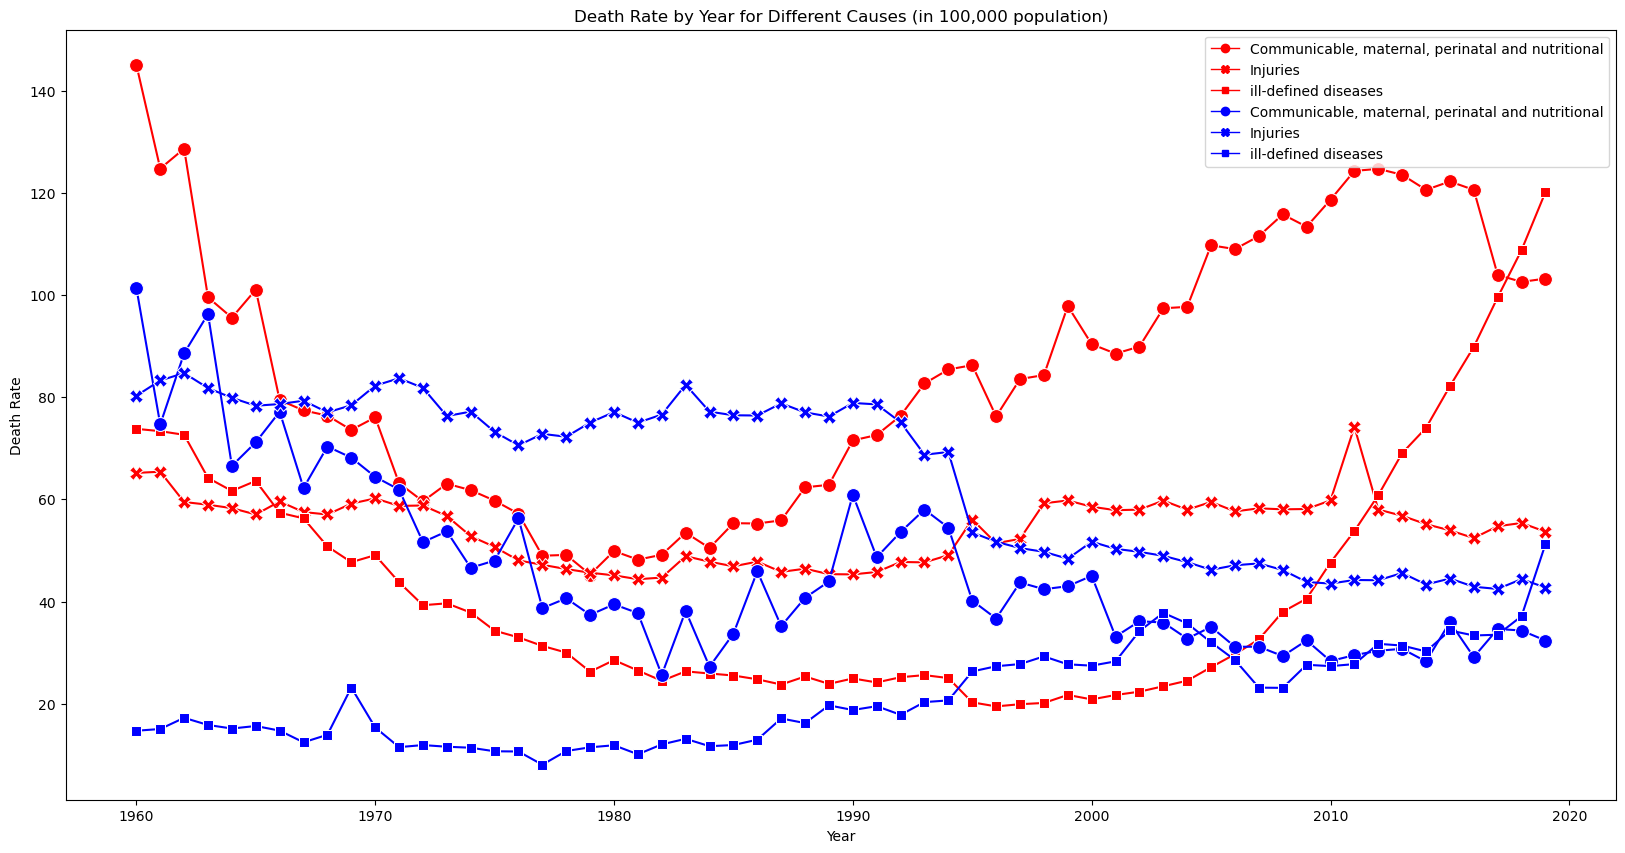

In [61]:
# Create a line plot with different lines for each 'cause'
plt.figure(figsize=(20, 10) )  # Set the figure size

# Use seaborn to create a line plot with a different line for each 'cause'
sns.set_palette(["red", "blue"])  # Set color palette

# Filter the data based on conditions
filtered_data = df_plotting[
    (df_plotting['cause'] != 'all causes') & (df_plotting['gender'] == 'All') & 
    (df_plotting['cause'] != 'Noncommunicable diseases')
]

# Create the line plot for JPN (set color to 'blue')
sns.lineplot(data=filtered_data, x='year', y='JPN_death_rate', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["red"])

# Create the line plot for CHE (set color to 'red')
sns.lineplot(data=filtered_data, x='year', y='CHE_death_rate', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["blue"])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Death Rate")
plt.title("Death Rate by Year for Different Causes (in 100,000 population)")

# Get the legend object
legend = plt.legend()

# Customize the legend
for line in legend.get_lines():
    line.set_linewidth(1)  # Set the legend line width

# Show the plot
plt.show()


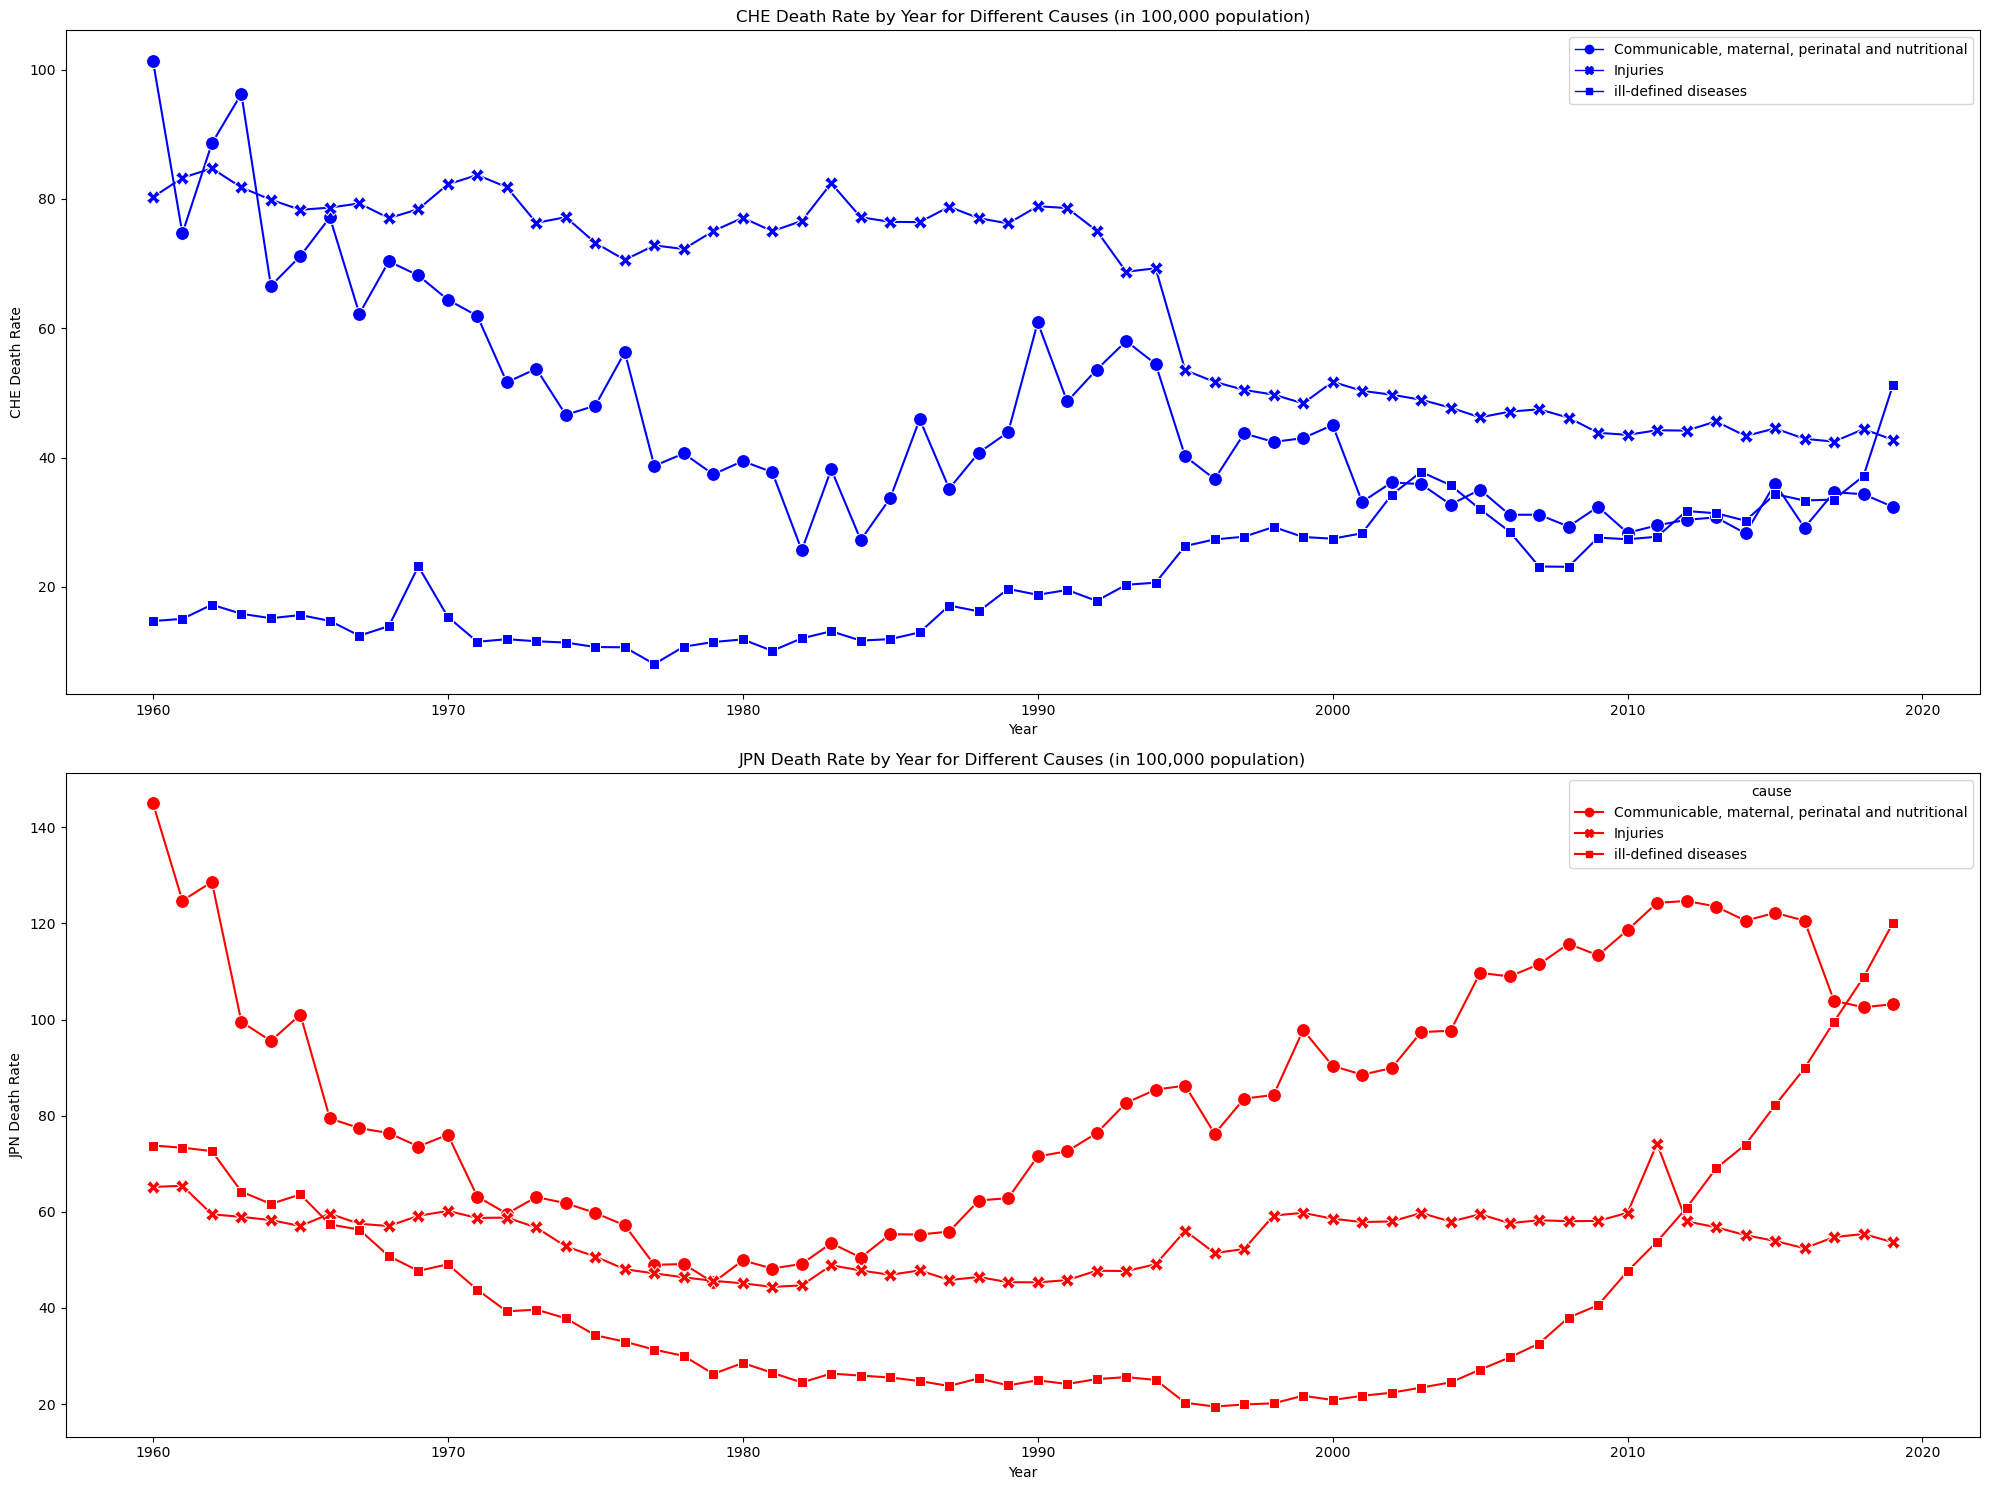

In [62]:
# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

# Use seaborn to create a line plot with a different line for each 'cause'
sns.set_palette(["red", "blue"])  # Set color palette

# Filter the data based on conditions
filtered_data = df_plotting[
    (df_plotting['cause'] != 'all causes') & (df_plotting['gender'] == 'All') & 
    (df_plotting['cause'] != 'Noncommunicable diseases')
]

# Create the line plot for CHE_death_rate and JPN_death_rate with the same colors
sns.lineplot(data=filtered_data, x='year', y='CHE_death_rate', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["blue"], ax=axes[0])
sns.lineplot(data=filtered_data, x='year', y='JPN_death_rate', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["red"], ax=axes[1])

# Add labels and title to the first subplot
axes[0].set_xlabel("Year")
axes[0].set_ylabel("CHE Death Rate")
axes[0].set_title("CHE Death Rate by Year for Different Causes (in 100,000 population)")

# Add labels and title to the second subplot
axes[1].set_xlabel("Year")
axes[1].set_ylabel("JPN Death Rate")
axes[1].set_title("JPN Death Rate by Year for Different Causes (in 100,000 population)")

# Get the legend object for the first subplot and customize it
legend = axes[0].legend()
for line in legend.get_lines():
    line.set_linewidth(1)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
unique_year = sorted(df_year_causes['Year'].unique())
unique_genders = sorted(df_year_causes['Sex'].unique())
unique_causes = sorted(df_year_causes['causes'].unique())
unique_countries = sorted(df_year_causes['Country Code'].unique())
df_plotting1 = pd.DataFrame(columns = ['year','gender','cause','percentage_JPN','percentage_CHE'])
for year in unique_year:
    for gender in unique_genders:
        for cause in unique_causes:
            percentage_jpn = df_year_causes[
                (df_year_causes['Year'] == year) &\
                (df_year_causes['Sex'] == gender) &\
                (df_year_causes['causes'] == cause) &\
                (df_year_causes['Country Code'] == 'JPN')
            ]['Percentage of cause-specific deaths out of total deaths'].sum()
            percentage_che = df_year_causes[
                (df_year_causes['Year'] == year) &\
                (df_year_causes['Sex'] == gender) &\
                (df_year_causes['causes'] == cause) &\
                (df_year_causes['Country Code'] == 'CHE')
            ]['Percentage of cause-specific deaths out of total deaths'].sum()
            new_row = {
                'year':year,
                'gender':gender,
                'cause':cause,
                'percentage_JPN':percentage_jpn,
                'percentage_CHE':percentage_che
            }
            df_plotting1 = df_plotting1.append(new_row, ignore_index=True)

In [35]:
df_plotting1.head(10)

,year,gender,cause,percentage_JPN,percentage_CHE
0,1960,All,"Communicable, maternal, perinatal and nutritional",19.179337,10.371636
1,1960,All,Injuries,8.617193,8.210159
2,1960,All,Noncommunicable diseases,62.446593,79.913234
3,1960,All,all causes,100.000000,100.000000
4,1960,All,ill-defined diseases,9.756878,1.504972
5,1960,All,malignant neoplasms,13.271035,19.315084
6,1960,Female,"Communicable, maternal, perinatal and nutritional",19.086950,10.047083
7,1960,Female,Injuries,5.581740,5.231027
8,1960,Female,Noncommunicable diseases,63.142221,83.042056
9,1960,Female,all causes,100.000000,100.000000


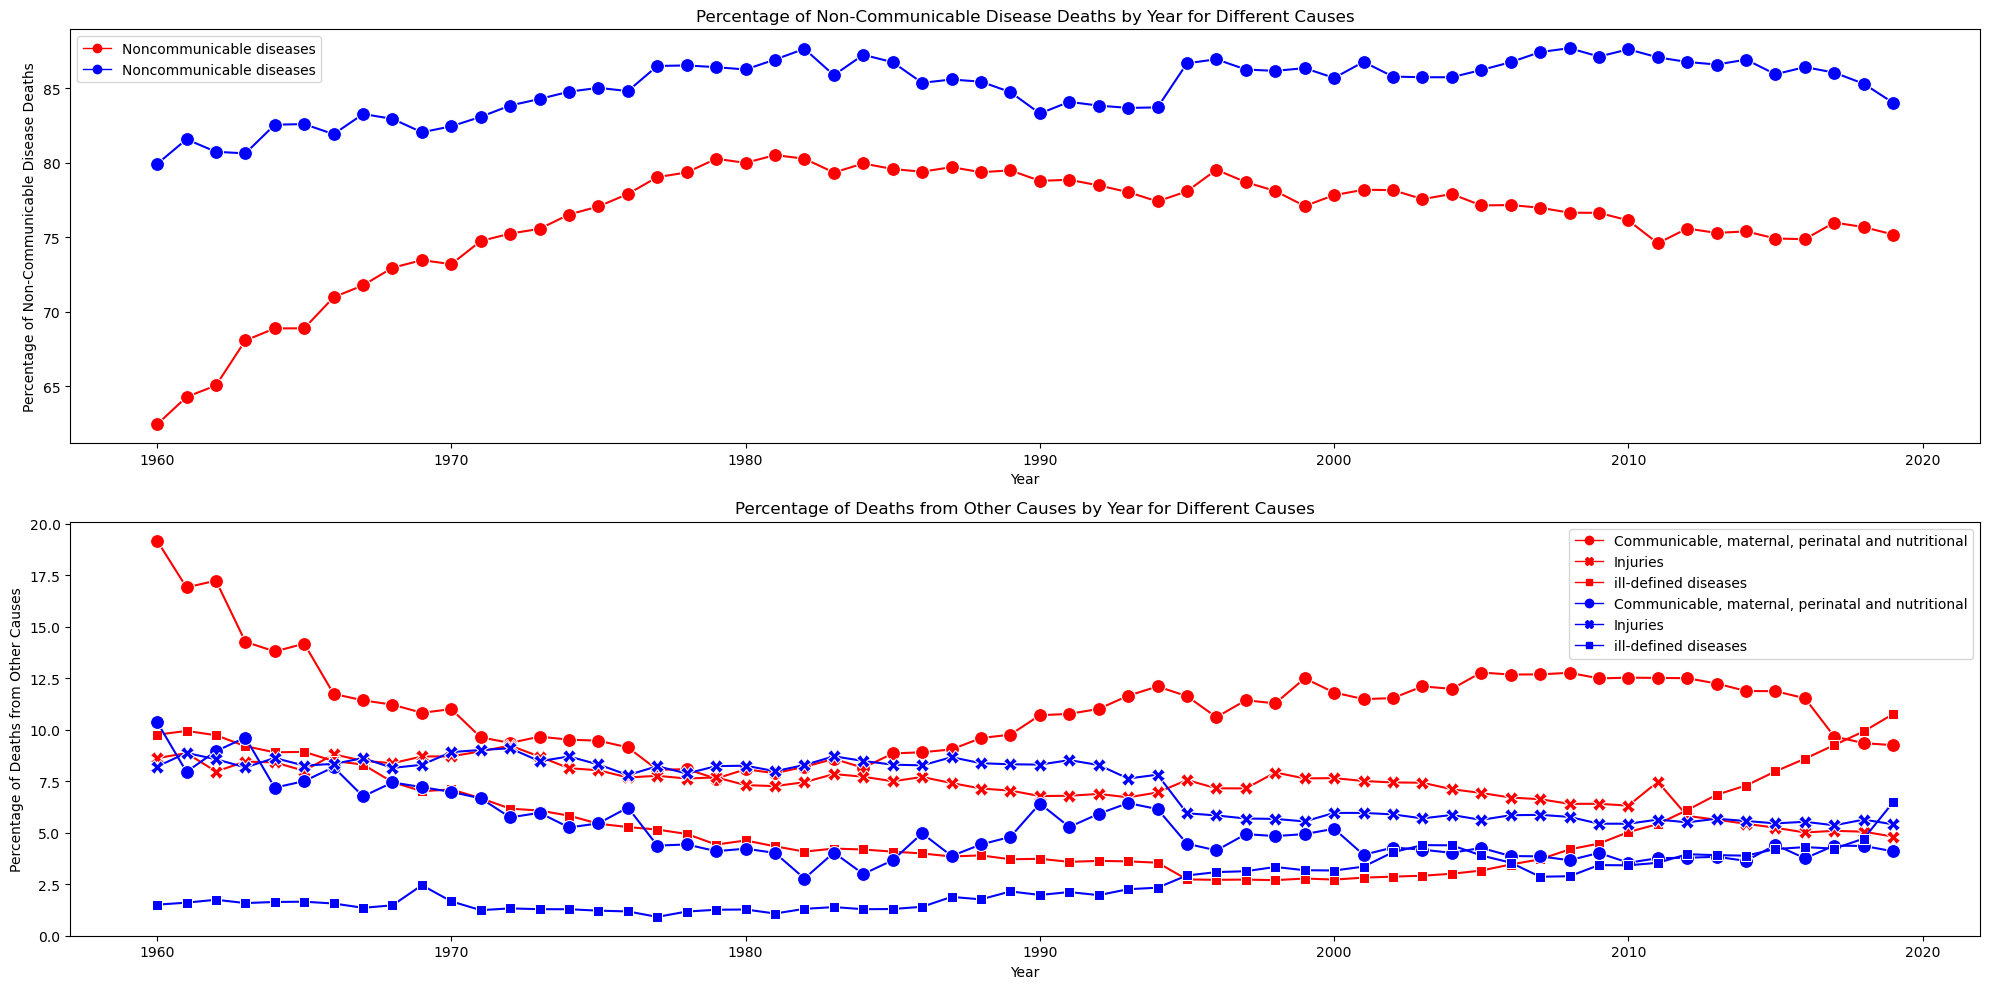

In [63]:
# Filter the data for Non-Communicable Diseases
ncd_data = df_plotting1[
    (df_plotting1['cause'] == 'Noncommunicable diseases') & (df_plotting1['gender'] == 'All') & (df_plotting1['cause'] != 'all causes')]

# Filter the data for all other causes (excluding 'Non-Communicable Diseases')
other_causes_data = df_plotting1[
    (df_plotting1['cause'] != 'Noncommunicable diseases') & (df_plotting1['gender'] == 'All') & (df_plotting1['cause'] != 'all causes')]

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Set the color palette
sns.set_palette(["red", "blue"])

# Create the line plot for Non-Communicable Diseases
sns.lineplot(data=ncd_data, x='year', y='percentage_JPN', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["red"], ax=ax1)
sns.lineplot(data=ncd_data, x='year', y='percentage_CHE', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["blue"], ax=ax1)

# Create the line plot for all other causes
sns.lineplot(data=other_causes_data, x='year', y='percentage_JPN', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["red"], ax=ax2)
sns.lineplot(data=other_causes_data, x='year', y='percentage_CHE', style='cause', markers=True, dashes=False, markersize=10, hue='cause', palette=["blue"], ax=ax2)

# Add labels and titles for both subplots
ax1.set_xlabel("Year")
ax1.set_ylabel("Percentage of Non-Communicable Disease Deaths")
ax1.set_title("Percentage of Non-Communicable Disease Deaths by Year for Different Causes")

ax2.set_xlabel("Year")
ax2.set_ylabel("Percentage of Deaths from Other Causes")
ax2.set_title("Percentage of Deaths from Other Causes by Year for Different Causes")

# Customize the legends for both subplots
for ax in [ax1, ax2]:
    legend = ax.legend()
    for line in legend.get_lines():
        line.set_linewidth(1)  # Set the legend line width

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

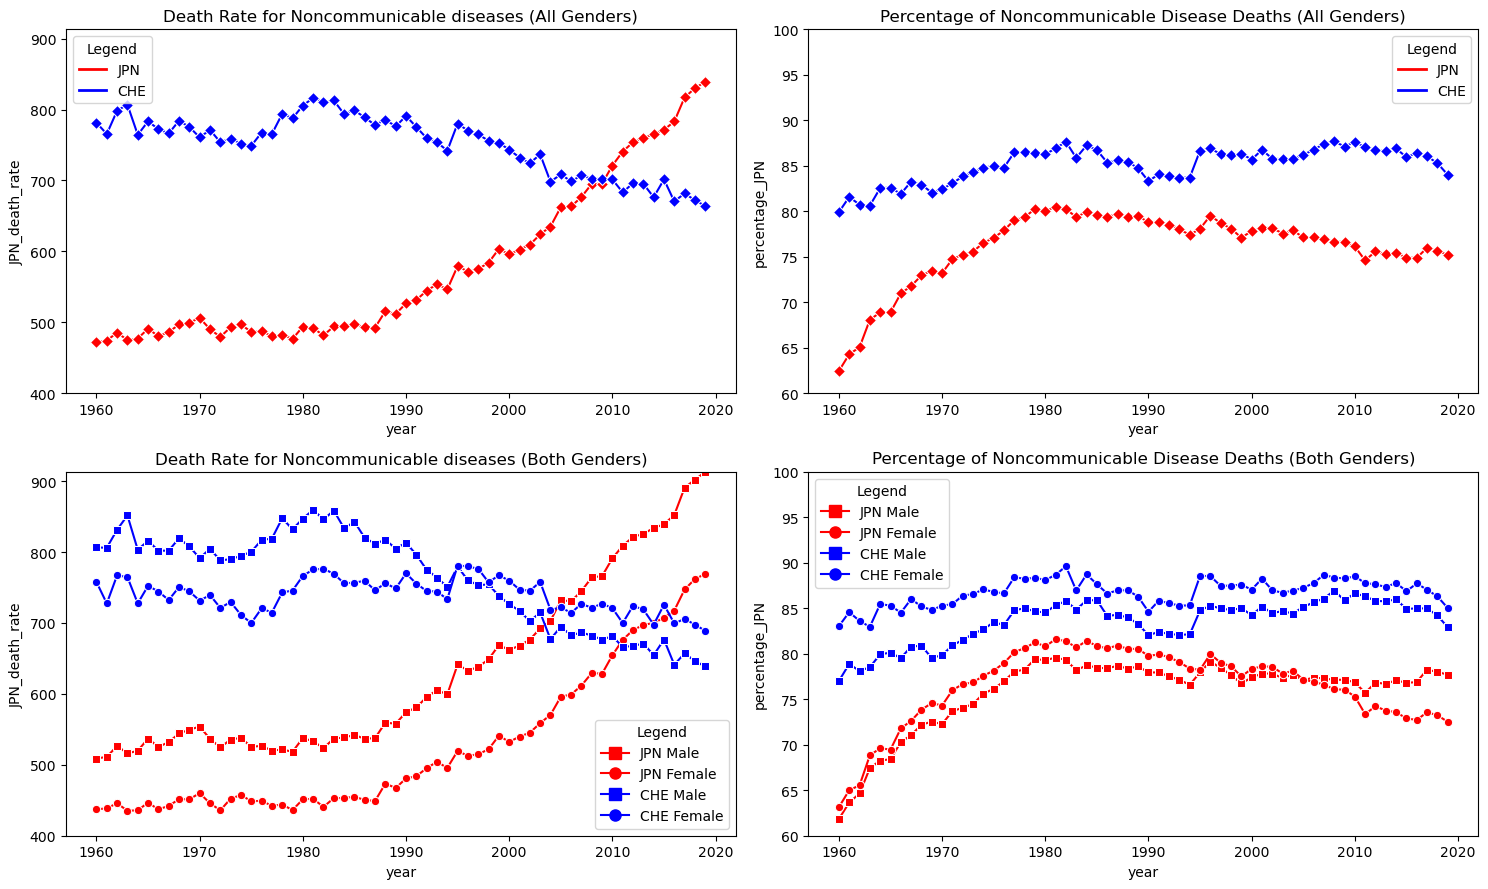

In [75]:
# Filter the data for "Noncommunicable diseases" for different genders
filtered_data_noncommunicable = df_plotting[
    (df_plotting['cause'] == 'Noncommunicable diseases') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_noncommunicable_male = df_plotting[
    (df_plotting['cause'] == 'Noncommunicable diseases') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_noncommunicable_female = df_plotting[
    (df_plotting['cause'] == 'Noncommunicable diseases') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits for death rates
y_axis_min = 400
y_axis_max = max(filtered_data_noncommunicable['JPN_death_rate'].max(), 
                 filtered_data_noncommunicable_male['JPN_death_rate'].max(),
                 filtered_data_noncommunicable_female['JPN_death_rate'].max())

# Filter the data for "Noncommunicable diseases" for different genders in df_plotting1
filtered_data_noncommunicable_percentage = df_plotting1[
    (df_plotting1['cause'] == 'Noncommunicable diseases') 
    & (df_plotting1['gender'] == 'All')
]

filtered_data_noncommunicable_percentage_male = df_plotting1[
    (df_plotting1['cause'] == 'Noncommunicable diseases') 
    & (df_plotting1['gender'] == 'Male')
]

filtered_data_noncommunicable_percentage_female = df_plotting1[
    (df_plotting1['cause'] == 'Noncommunicable diseases') 
    & (df_plotting1['gender'] == 'Female')
]

# Set the common y-axis limits for percentages
y_axis_min_percentage = 60  # Adjust this as needed
y_axis_max_percentage = 100

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot the first graph for "Noncommunicable diseases" (All Genders) on the left-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable, x='year', y='JPN_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 0])
sns.lineplot(data=filtered_data_noncommunicable, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 0])
axes[0, 0].set_title("Death Rate for Noncommunicable diseases (All Genders)")
axes[0, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "Noncommunicable diseases" (Both Genders) on the left-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_noncommunicable_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_noncommunicable_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_noncommunicable_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
axes[1, 0].set_title("Death Rate for Noncommunicable diseases (Both Genders)")
axes[1, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 0].legend(handles=legend_labels_gender, title="Legend")

# Plot the third graph for "Noncommunicable diseases" (All Genders) with percentages on the right-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable_percentage, x='year', y='percentage_JPN', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 1])
sns.lineplot(data=filtered_data_noncommunicable_percentage, x='year', y='percentage_CHE', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 1])
axes[0, 1].set_title("Percentage of Noncommunicable Disease Deaths (All Genders)")
axes[0, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the third graph
legend_labels_all_percentage = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                               Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 1].legend(handles=legend_labels_all_percentage, title="Legend")

# Plot the fourth graph for "Noncommunicable diseases" (Both Genders) with percentages on the right-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_noncommunicable_percentage_male, x='year', y='percentage_JPN', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_noncommunicable_percentage_female, x='year', y='percentage_JPN', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_noncommunicable_percentage_male, x='year', y='percentage_CHE', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_noncommunicable_percentage_female, x='year', y='percentage_CHE', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
axes[1, 1].set_title("Percentage of Noncommunicable Disease Deaths (Both Genders)")
axes[1, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the fourth graph
legend_labels_gender_percentage = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                                   Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                                   Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                                   Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 1].legend(handles=legend_labels_gender_percentage, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

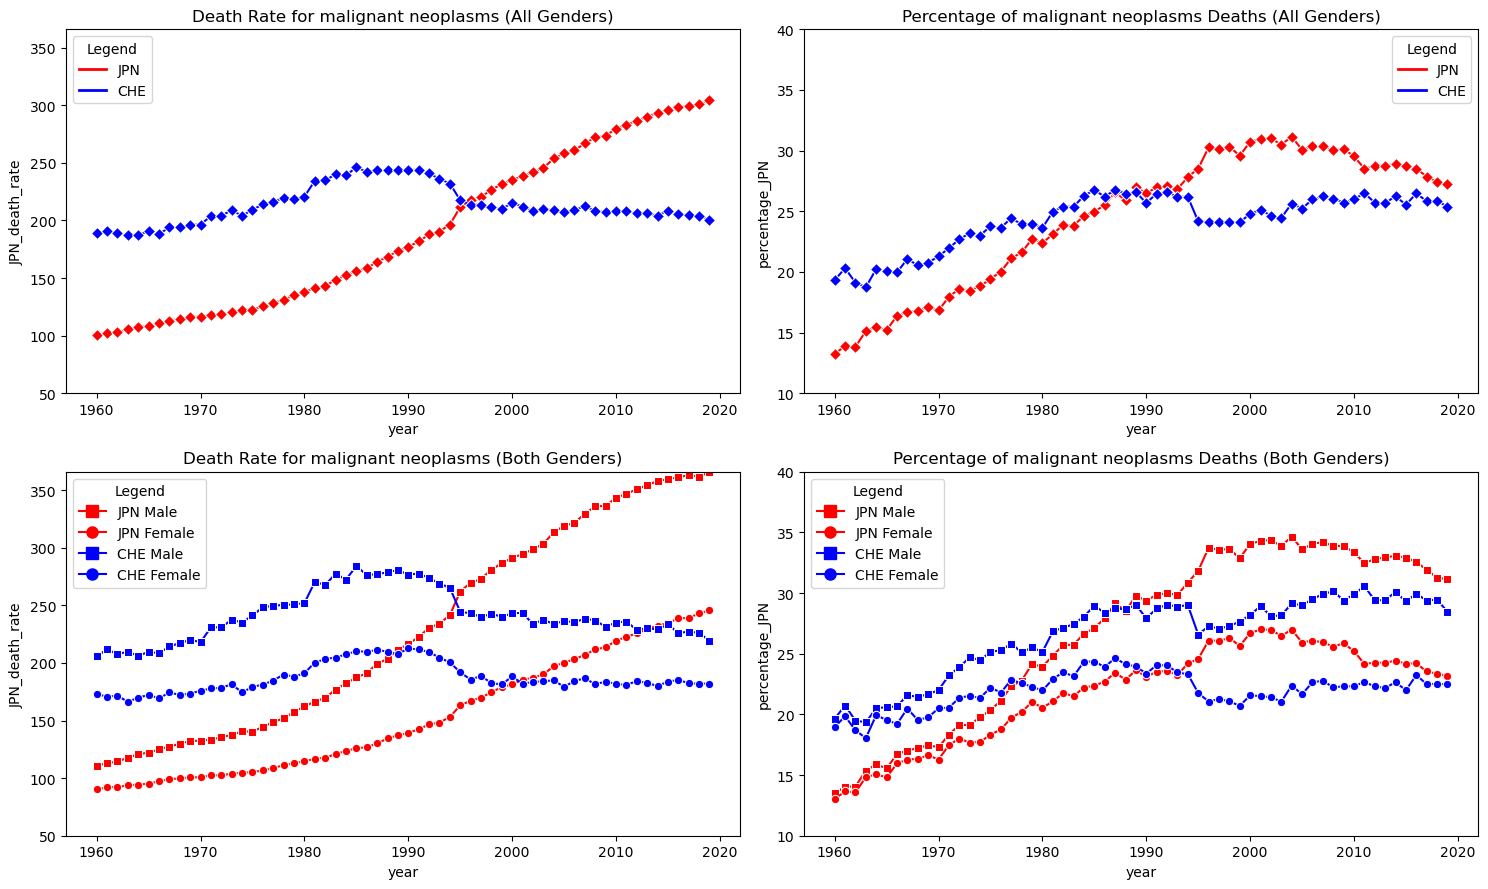

In [41]:
# Filter the data for "malignant neoplasms" for different genders
filtered_data_malignant_neoplasms = df_plotting[
    (df_plotting['cause'] == 'malignant neoplasms') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_malignant_neoplasms_male = df_plotting[
    (df_plotting['cause'] == 'malignant neoplasms') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_malignant_neoplasms_female = df_plotting[
    (df_plotting['cause'] == 'malignant neoplasms') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits for death rates
y_axis_min = 50
y_axis_max = max(filtered_data_malignant_neoplasms['JPN_death_rate'].max(), 
                 filtered_data_malignant_neoplasms_male['JPN_death_rate'].max(),
                 filtered_data_malignant_neoplasms_female['JPN_death_rate'].max())

# Filter the data for "malignant neoplasms" for different genders in df_plotting1
filtered_data_malignant_neoplasms_percentage = df_plotting1[
    (df_plotting1['cause'] == 'malignant neoplasms') 
    & (df_plotting1['gender'] == 'All')
]

filtered_data_malignant_neoplasms_percentage_male = df_plotting1[
    (df_plotting1['cause'] == 'malignant neoplasms') 
    & (df_plotting1['gender'] == 'Male')
]

filtered_data_malignant_neoplasms_percentage_female = df_plotting1[
    (df_plotting1['cause'] == 'malignant neoplasms') 
    & (df_plotting1['gender'] == 'Female')
]

# Set the common y-axis limits for percentages
y_axis_min_percentage = 10  # Adjust this as needed
y_axis_max_percentage = 40

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot the first graph for "malignant neoplasms" (All Genders) on the left-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_malignant_neoplasms, x='year', y='JPN_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 0])
sns.lineplot(data=filtered_data_malignant_neoplasms, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 0])
axes[0, 0].set_title("Death Rate for malignant neoplasms (All Genders)")
axes[0, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "malignant neoplasms" (Both Genders) on the left-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_malignant_neoplasms_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_malignant_neoplasms_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_malignant_neoplasms_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_malignant_neoplasms_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
axes[1, 0].set_title("Death Rate for malignant neoplasms (Both Genders)")
axes[1, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 0].legend(handles=legend_labels_gender, title="Legend")

# Plot the third graph for "malignant neoplasms" (All Genders) with percentages on the right-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_malignant_neoplasms_percentage, x='year', y='percentage_JPN', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 1])
sns.lineplot(data=filtered_data_malignant_neoplasms_percentage, x='year', y='percentage_CHE', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 1])
axes[0, 1].set_title("Percentage of malignant neoplasms Deaths (All Genders)")
axes[0, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the third graph
legend_labels_all_percentage = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                               Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 1].legend(handles=legend_labels_all_percentage, title="Legend")

# Plot the fourth graph for "malignant neoplasms" (Both Genders) with percentages on the right-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_malignant_neoplasms_percentage_male, x='year', y='percentage_JPN', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_malignant_neoplasms_percentage_female, x='year', y='percentage_JPN', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_malignant_neoplasms_percentage_male, x='year', y='percentage_CHE', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_malignant_neoplasms_percentage_female, x='year', y='percentage_CHE', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
axes[1, 1].set_title("Percentage of malignant neoplasms Deaths (Both Genders)")
axes[1, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the fourth graph
legend_labels_gender_percentage = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                                   Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                                   Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                                   Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 1].legend(handles=legend_labels_gender_percentage, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

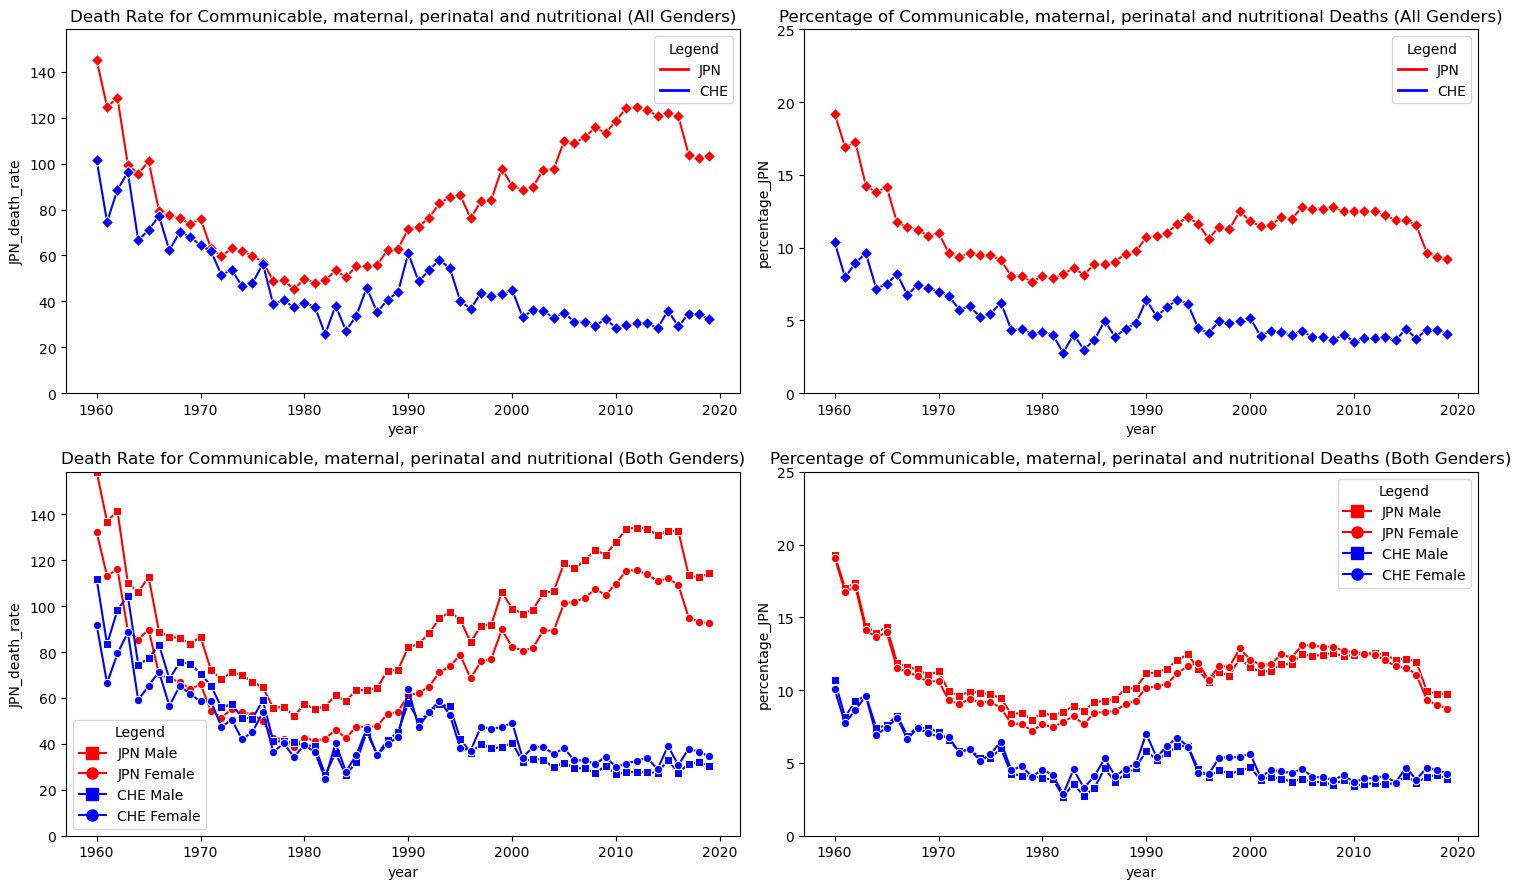

In [76]:
# Filter the data for "Communicable, maternal, perinatal and nutritional" for different genders
filtered_data_communicable = df_plotting[
    (df_plotting['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_communicable_male = df_plotting[
    (df_plotting['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_communicable_female = df_plotting[
    (df_plotting['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits for death rates
y_axis_min = 0
y_axis_max = max(filtered_data_communicable['JPN_death_rate'].max(), 
                 filtered_data_communicable_male['JPN_death_rate'].max(),
                 filtered_data_communicable_female['JPN_death_rate'].max())

# Filter the data for "Communicable, maternal, perinatal and nutritional" for different genders in df_plotting1
filtered_data_communicable_percentage = df_plotting1[
    (df_plotting1['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting1['gender'] == 'All')
]

filtered_data_communicable_percentage_male = df_plotting1[
    (df_plotting1['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting1['gender'] == 'Male')
]

filtered_data_communicable_percentage_female = df_plotting1[
    (df_plotting1['cause'] == 'Communicable, maternal, perinatal and nutritional') 
    & (df_plotting1['gender'] == 'Female')
]

# Set the common y-axis limits for percentages
y_axis_min_percentage = 0  # Adjust this as needed
y_axis_max_percentage = 25

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot the first graph for "Communicable, maternal, perinatal and nutritional" (All Genders) on the left-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_communicable, x='year', y='JPN_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 0])
sns.lineplot(data=filtered_data_communicable, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 0])
axes[0, 0].set_title("Death Rate for Communicable, maternal, perinatal and nutritional (All Genders)")
axes[0, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "Communicable, maternal, perinatal and nutritional" (Both Genders) on the left-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_communicable_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_communicable_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_communicable_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_communicable_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
axes[1, 0].set_title("Death Rate for Communicable, maternal, perinatal and nutritional (Both Genders)")
axes[1, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 0].legend(handles=legend_labels_gender, title="Legend")

# Plot the third graph for "Communicable, maternal, perinatal and nutritional" (All Genders) with percentages on the right-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_communicable_percentage, x='year', y='percentage_JPN', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 1])
sns.lineplot(data=filtered_data_communicable_percentage, x='year', y='percentage_CHE', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 1])
axes[0, 1].set_title("Percentage of Communicable, maternal, perinatal and nutritional Deaths (All Genders)")
axes[0, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the third graph
legend_labels_all_percentage = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                               Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 1].legend(handles=legend_labels_all_percentage, title="Legend")

# Plot the fourth graph for "Communicable, maternal, perinatal and nutritional" (Both Genders) with percentages on the right-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_communicable_percentage_male, x='year', y='percentage_JPN', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_communicable_percentage_female, x='year', y='percentage_JPN', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_communicable_percentage_male, x='year', y='percentage_CHE', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_communicable_percentage_female, x='year', y='percentage_CHE', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
axes[1, 1].set_title("Percentage of Communicable, maternal, perinatal and nutritional Deaths (Both Genders)")
axes[1, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the fourth graph
legend_labels_gender_percentage = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                                   Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                                   Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                                   Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 1].legend(handles=legend_labels_gender_percentage, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

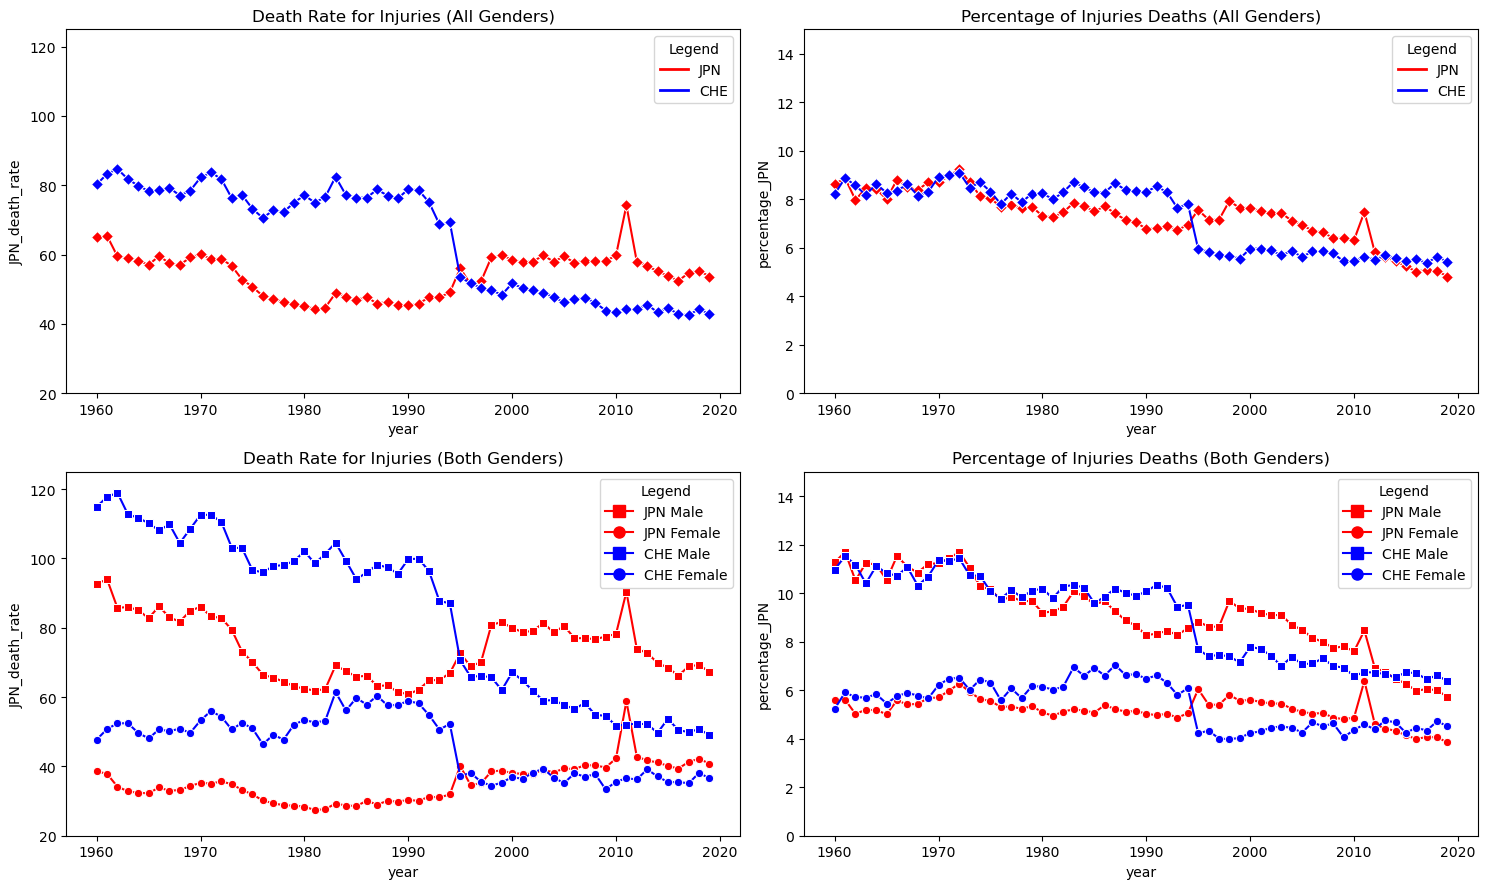

In [77]:
# Filter the data for "Injuries" for different genders
filtered_data_injuries = df_plotting[
    (df_plotting['cause'] == 'Injuries') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_injuries_male = df_plotting[
    (df_plotting['cause'] == 'Injuries') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_injuries_female = df_plotting[
    (df_plotting['cause'] == 'Injuries') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits for death rates
y_axis_min = 20
y_axis_max = 125

# Filter the data for "Injuries" for different genders in df_plotting1
filtered_data_injuries_percentage = df_plotting1[
    (df_plotting1['cause'] == 'Injuries') 
    & (df_plotting1['gender'] == 'All')
]

filtered_data_injuries_percentage_male = df_plotting1[
    (df_plotting1['cause'] == 'Injuries') 
    & (df_plotting1['gender'] == 'Male')
]

filtered_data_injuries_percentage_female = df_plotting1[
    (df_plotting1['cause'] == 'Injuries') 
    & (df_plotting1['gender'] == 'Female')
]

# Set the common y-axis limits for percentages
y_axis_min_percentage = 0  # Adjust this as needed
y_axis_max_percentage = 15

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot the first graph for "Injuries" (All Genders) on the left-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_injuries, x='year', y='JPN_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 0])
sns.lineplot(data=filtered_data_injuries, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 0])
axes[0, 0].set_title("Death Rate for Injuries (All Genders)")
axes[0, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "Injuries" (Both Genders) on the left-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_injuries_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_injuries_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_injuries_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_injuries_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
axes[1, 0].set_title("Death Rate for Injuries (Both Genders)")
axes[1, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 0].legend(handles=legend_labels_gender, title="Legend")

# Plot the third graph for "Injuries" (All Genders) with percentages on the right-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_injuries_percentage, x='year', y='percentage_JPN', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 1])
sns.lineplot(data=filtered_data_injuries_percentage, x='year', y='percentage_CHE', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 1])
axes[0, 1].set_title("Percentage of Injuries Deaths (All Genders)")
axes[0, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the third graph
legend_labels_all_percentage = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                               Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 1].legend(handles=legend_labels_all_percentage, title="Legend")

# Plot the fourth graph for "Injuries" (Both Genders) with percentages on the right-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_injuries_percentage_male, x='year', y='percentage_JPN', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_injuries_percentage_female, x='year', y='percentage_JPN', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_injuries_percentage_male, x='year', y='percentage_CHE', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_injuries_percentage_female, x='year', y='percentage_CHE', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
axes[1, 1].set_title("Percentage of Injuries Deaths (Both Genders)")
axes[1, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the fourth graph
legend_labels_gender_percentage = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                                   Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                                   Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                                   Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 1].legend(handles=legend_labels_gender_percentage, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

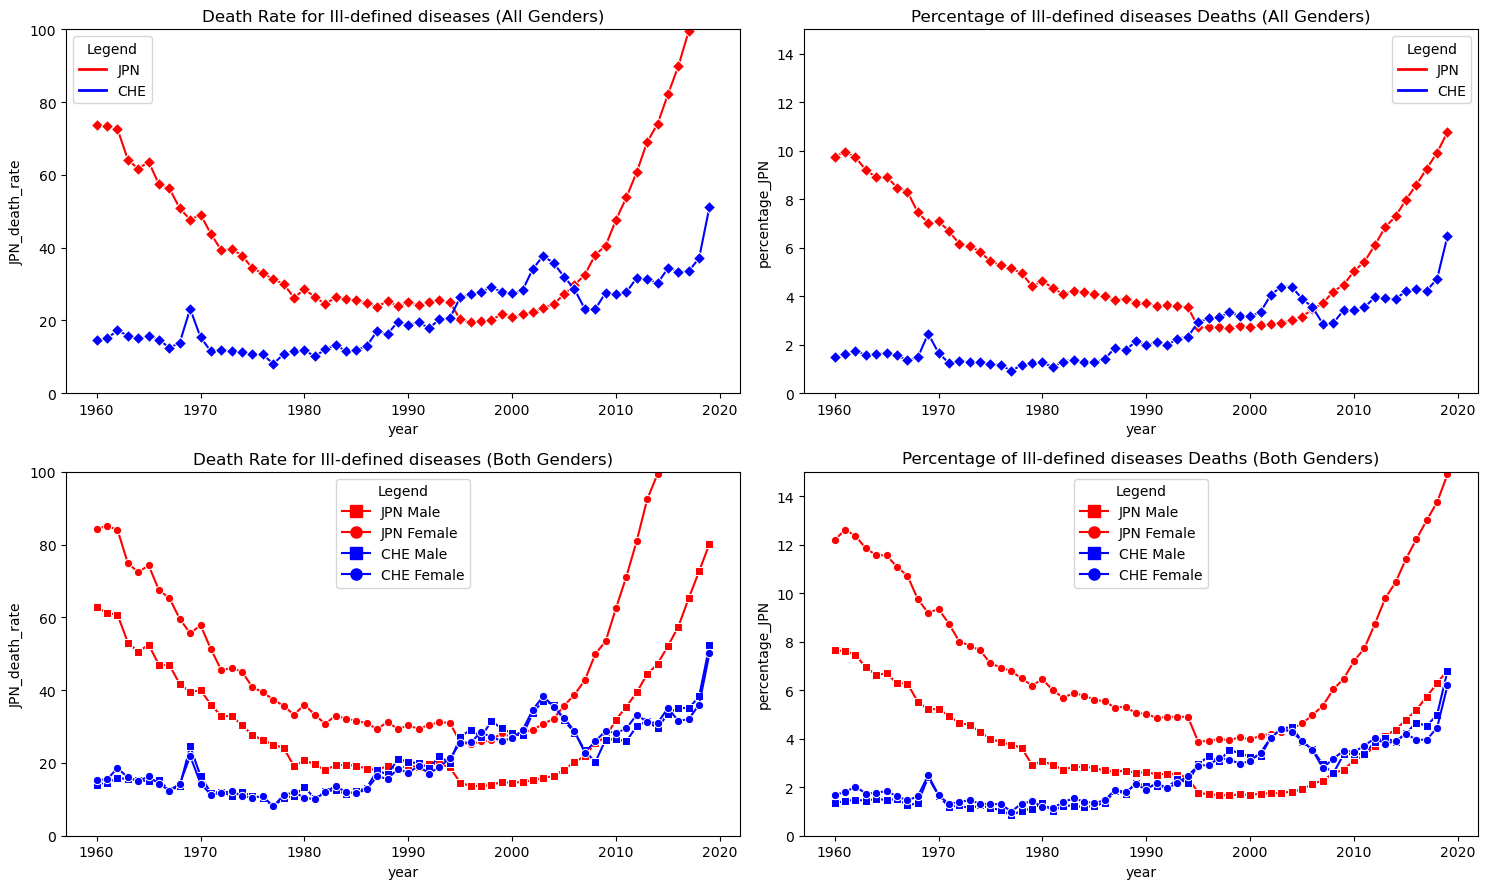

In [78]:
# Filter the data for "Ill-defined diseases" for different genders
filtered_data_ill_defined = df_plotting[
    (df_plotting['cause'] == 'ill-defined diseases') 
    & (df_plotting['gender'] == 'All')
]

filtered_data_ill_defined_male = df_plotting[
    (df_plotting['cause'] == 'ill-defined diseases') 
    & (df_plotting['gender'] == 'Male')
]

filtered_data_ill_defined_female = df_plotting[
    (df_plotting['cause'] == 'ill-defined diseases') 
    & (df_plotting['gender'] == 'Female')
]

# Set the common y-axis limits for death rates
y_axis_min = 0
y_axis_max = 100

# Filter the data for "Ill-defined diseases" for different genders in df_plotting1
filtered_data_ill_defined_percentage = df_plotting1[
    (df_plotting1['cause'] == 'ill-defined diseases') 
    & (df_plotting1['gender'] == 'All')
]

filtered_data_ill_defined_percentage_male = df_plotting1[
    (df_plotting1['cause'] == 'ill-defined diseases') 
    & (df_plotting1['gender'] == 'Male')
]

filtered_data_ill_defined_percentage_female = df_plotting1[
    (df_plotting1['cause'] == 'ill-defined diseases') 
    & (df_plotting1['gender'] == 'Female')
]

# Set the common y-axis limits for percentages
y_axis_min_percentage = 0  # Adjust this as needed
y_axis_max_percentage = 15

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot the first graph for "Ill-defined diseases" (All Genders) on the left-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_ill_defined, x='year', y='JPN_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 0])
sns.lineplot(data=filtered_data_ill_defined, x='year', y='CHE_death_rate', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 0])
axes[0, 0].set_title("Death Rate for Ill-defined diseases (All Genders)")
axes[0, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the first graph
legend_labels_all = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                     Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 0].legend(handles=legend_labels_all, title="Legend")

# Plot the second graph for "Ill-defined diseases" (Both Genders) on the left-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_ill_defined_male, x='year', y='JPN_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_ill_defined_female, x='year', y='JPN_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_ill_defined_male, x='year', y='CHE_death_rate', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
sns.lineplot(data=filtered_data_ill_defined_female, x='year', y='CHE_death_rate', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 0])
axes[1, 0].set_title("Death Rate for Ill-defined diseases (Both Genders)")
axes[1, 0].set_ylim(y_axis_min, y_axis_max)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the second graph
legend_labels_gender = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                        Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                        Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                        Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 0].legend(handles=legend_labels_gender, title="Legend")

# Plot the third graph for "Ill-defined diseases" (All Genders) with percentages on the right-top subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_ill_defined_percentage, x='year', y='percentage_JPN', style='cause', markers='D', dashes=False, hue='cause', palette=["red"], ax=axes[0, 1])
sns.lineplot(data=filtered_data_ill_defined_percentage, x='year', y='percentage_CHE', style='cause', markers='D', dashes=False, hue='cause', palette=["blue"], ax=axes[0, 1])
axes[0, 1].set_title("Percentage of Ill-defined diseases Deaths (All Genders)")
axes[0, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the third graph
legend_labels_all_percentage = [Line2D([0], [0], color='red', lw=2, label='JPN'),
                               Line2D([0], [0], color='blue', lw=2, label='CHE')]
axes[0, 1].legend(handles=legend_labels_all_percentage, title="Legend")

# Plot the fourth graph for "Ill-defined diseases" (Both Genders) with percentages on the right-middle subplot
sns.set_palette(["red", "blue"])  # Set color palette
sns.lineplot(data=filtered_data_ill_defined_percentage_male, x='year', y='percentage_JPN', style='cause', markers="s", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_ill_defined_percentage_female, x='year', y='percentage_JPN', style='cause', markers="o", dashes=False, hue='cause', palette=["red"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_ill_defined_percentage_male, x='year', y='percentage_CHE', style='cause', markers="s", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
sns.lineplot(data=filtered_data_ill_defined_percentage_female, x='year', y='percentage_CHE', style='cause', markers="o", dashes=False, hue='cause', palette=["blue"], ax=axes[1, 1])
axes[1, 1].set_title("Percentage of Ill-defined diseases Deaths (Both Genders)")
axes[1, 1].set_ylim(y_axis_min_percentage, y_axis_max_percentage)  # Set the same y-axis limits for all subplots

# Create custom legend entries for the fourth graph
legend_labels_gender_percentage = [Line2D([0], [0], color='red', marker="s", markersize=8, label='JPN Male'),
                                   Line2D([0], [0], color='red', marker="o", markersize=8, label='JPN Female'),
                                   Line2D([0], [0], color='blue', marker="s", markersize=8, label='CHE Male'),
                                   Line2D([0], [0], color='blue', marker="o", markersize=8, label='CHE Female')]
axes[1, 1].legend(handles=legend_labels_gender_percentage, title="Legend")

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()